# TOPIC: STUDENT DEPRESSION 
AIM: Predicting student depression   
SUBJECT: Machine Learning  
ANALYSIS TYPE: Classification task    
TEAM MEMBERS: Isabella Cappiello, Nathan Dubourg, Romain Sartori  

### APPLOAD THE DATASET

In [265]:
# Load the needed lybraries
import numpy as np
import pandas as pd

# upload the DataFrame
df = pd.read_csv("student_dep_data.csv")
df.head(60)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


In [266]:
num_rows, num_columns = df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

columns_names = df.columns
print(f"The feature are {columns_names}.")

The dataset has 27901 rows and 18 columns.
The feature are Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object').


#### Variables explaination

**id**: Unique identifier for each respondent; irrelevant for analysis (can be dropped.  
**Gender**: Helps identify gender-based trends or disparities in depression levels.  
**Age**: Relevant for analyzing how depression correlates with age.  
**City**: Useful for identifying regional patterns in mental health.  
Profession**: Captures the impact of professional status (e.g., being a student) on depression.  
**Academic Pressure**: Key to understanding the role of academic stress in mental health.  
**Work Pressure**: Helps analyze how work-related stress impacts depression.  
**CGPA**: Reflects academic performance, which may correlate with mental health.  
**Study Satisfaction**: Indicates how satisfaction with studies influences depression.  
**Job Satisfaction**: Relevant for understanding the impact of job fulfillment on mental well-being.  
**Sleep Duration**: Critical for exploring the relationship between sleep habits and mental health.  
**Dietary Habits**: Highlights how diet quality affects mental health.  
**Degree**: Useful for analyzing mental health trends across different education levels.  
**Have you ever had suicidal thoughts?**: Directly related to understanding extreme mental health risks.  
**Work/Study Hours**: Reflects the impact of workload on mental health.  
**Financial Stress**: Important for evaluating the role of financial factors in mental health.  
**Family History of Mental Illness**: Crucial for understanding genetic or familial influences on depression.  
**Depression**: The target variable for predictive analysis.  

### DATA PREPARATION

#### Remove id variable

In [267]:
# Remove the ID variable
df = df.drop(columns="id")  
df.shape

(27901, 17)

#### Detect and remove NA

In [268]:
# NA detection 
na_per_colonna = df.isna().sum()

print("NA per colonna:")
print(na_per_colonna)

totale_na = df.isna().sum().sum()
print("Totale NA:", totale_na)

NA per colonna:
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64
Totale NA: 3


COMMENT: Since they are not so much, we can delete from the dataset the 3 students for which there are no data concerning the financial stress. 

In [269]:
df = df.dropna(axis=0)
df.head(20)

# Check NA have been correctly deleted 
totale_na = df.isna().sum().sum()
print("Totale NA:", totale_na)
df.columns
df.shape

Totale NA: 0


(27898, 17)

In [270]:
df.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

#### Check the frequency for each category of categorical variables

In [271]:
# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Compute the frequency for each category of categorical variables
for col in categorical_columns:
    print(f"Frequency for the variable '{col}':")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")

Frequency for the variable 'Gender':
Gender
Male      15546
Female    12352
Name: count, dtype: int64

----------------------------------------

Frequency for the variable 'City':
City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanv

COMMENT: As we can see, there are some categories underrepresented such as "Others" for Sleep Duration, Dietary Habits and Degree. Keeping such small categories could introduce noise, reduce model stability, and hinder generalization. Removing it ensures a more balanced and reliable classification model. That's why observations belonging to underrepresented categories are removed from the dataset. Moreover, it is better to rename the variables "Have you ever had suicidal thoughts ?" and "Family History of Mental Illness" because the actual name is too long. 

#### Remove underrepresented category "Others"   
from Sleep Duration, Dietary Habits and Degree

In [272]:
# List of categorical variables to filter
cols_to_filter = ["Sleep Duration", "Dietary Habits", "Degree"]

# Remove rows where any of these columns have the category "Others"
df = df[~df[cols_to_filter].isin(["Others"]).any(axis=1)]
df.shape

(27833, 17)

COMMENT: The others problematic variables are City, Students and Degree. The first contains both valid and invalid Indian cities, while the second contains mostly students and some underrepresented professions. The third encodes the degrees' types in a non easily understandable way. Let's modify one at a time those variables. 

#### Clean the City variable

In [273]:
# City analysis
# Check whether the city are correct
unique_cities = df['City'].unique()
print("The usual cities are ", unique_cities)

# Count the number of unique cities
unique_city_count = df['City'].nunique()
print(f"Number of unique cities: {unique_city_count}")

# Count the occurrences of each degree category
cities_counts = df['City'].value_counts()
print("\nCount of data for city:\n", cities_counts)

The usual cities are  ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Number of unique cities: 52

Count of data for city:
 City
Kalyan                1568
Srinagar              1367
Hyderabad             1337
Vasai-Virar           1287
Lucknow               1153
Thane                 1139
Ludhiana              1109
Agra                  1092
Surat                 1078
Kolkata               1058
Jaipur                1035
Patna                 1004
Visakhapatnam          967
Pune                   967
Ahmedabad              946
B

COMMENT: Most of the cities listed are in India. The others are invalid, likely due to typing mistakes or general errors. If the dataset comes from a survey, some respondents may have mistakenly entered their names instead of their city of residence or simply wrongly answered. Let's remove the invalid cities.   

In [274]:
# Regular expressions for filtering only the valid cities
import re
city_pattern = re.compile(r'^(?!.*\d)(?!.*(?:M\.Tech|M\.Com|ME|City|Less|\.0)).*[A-Za-z\s-]+$')
df = df[df['City'].apply(lambda x: bool(city_pattern.match(str(x))))]

# Check whether the city are correct
unique_cities = df['City'].unique()
print("The usual cities are ", unique_cities)

# Count the number of unique cities
unique_city_count = df['City'].nunique()
print(f"Number of unique cities: {unique_city_count}")

# Count the occurrences of each degree category
cities_counts = df['City'].value_counts()
print("\nCount of data for city:\n", cities_counts)

The usual cities are  ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'Bhavna' 'Mira' 'Harsha' 'Vaanya' 'Gaurav'
 'Harsh' 'Reyansh' 'Kibara' 'Rashi' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Number of unique cities: 45

Count of data for city:
 City
Kalyan           1568
Srinagar         1367
Hyderabad        1337
Vasai-Virar      1287
Lucknow          1153
Thane            1139
Ludhiana         1109
Agra             1092
Surat            1078
Kolkata          1058
Jaipur           1035
Patna            1004
Visakhapatnam     967
Pune              967
Ahmedabad         946
Bhopal            932
Chennai           885
Meerut            823
Rajkot            814
Bangalore         766
Delhi             766
Ghaziabad     

COMMENT: Using the regular expression, we removed some invalid cities, but there are still some categories of cities that don't correspond to real cities. They are the ones for which there are at maximum two values. Those categories are not cities, they seem more common personal names in India or typing errors. To remove them, we create a list of valid cities to keep. 

In [275]:
# List of valid cities
valid_cities = {"Visakhapatnam", "Bangalore", "Srinagar", "Varanasi", "Jaipur", "Pune", "Thane",
                "Chennai", "Nagpur", "Nashik", "Vadodara", "Kalyan", "Rajkot", "Ahmedabad",
                "Kolkata", "Mumbai", "Lucknow", "Indore", "Surat", "Ludhiana", "Bhopal",
                "Meerut", "Agra", "Ghaziabad", "Hyderabad", "Vasai-Virar", "Kanpur", "Patna",
                "Faridabad", "Delhi"}  

# Keep only the valid cities
df = df[df['City'].isin(valid_cities)]
df.reset_index(drop=True, inplace=True)

In [276]:
# Check whether the cities are correct
unique_cities = df['City'].unique()
print("The usual cities are ", unique_cities)

# Count the number of unique cities
unique_city_count = df['City'].nunique()
print(f"Number of unique cities: {unique_city_count}")

# Count the occurrences of each degree category
cities_counts = df['City'].value_counts()
print("\nCount of data for city:\n", cities_counts)

The usual cities are  ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi']
Number of unique cities: 30

Count of data for city:
 City
Kalyan           1568
Srinagar         1367
Hyderabad        1337
Vasai-Virar      1287
Lucknow          1153
Thane            1139
Ludhiana         1109
Agra             1092
Surat            1078
Kolkata          1058
Jaipur           1035
Patna            1004
Pune              967
Visakhapatnam     967
Ahmedabad         946
Bhopal            932
Chennai           885
Meerut            823
Rajkot            814
Delhi             766
Bangalore         766
Ghaziabad         743
Mumbai            695
Vadodara          692
Varanasi          683
Nagpur            647
Indore            642
Kanpur            6

COMMENT: After those modifications, the city column contains only valid cities. Moreover, we notice that all those cities are in India. 

#### Clean the Profession variable and then drop it from the dataset

In [277]:
# Check they are all students
unique_professions = df['Profession'].unique()
print("The professions are ", unique_professions)

student_count = df['Profession'].str.count('Student').sum()
print(f"The students are {student_count}.")

num_rows, num_columns = df.shape
print(f'The non students are {num_rows-student_count}')

The professions are  ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
The students are 27776.
The non students are 31


COMMENT: Since the goal is detecting the depression status among students, we need to remove from the dataset the rows containing data of non-students. 

In [278]:
# Keep only students' data
df = df[df['Profession'] == 'Student'] 

# Check they have been corretly deleted
unique_professions = df['Profession'].unique()
print("The professions are ", unique_professions)
num_rows, num_columns = df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The professions are  ['Student']
The dataset has 27776 rows and 17 columns.


COMMENT: Having ensured that the dataset contains only student data, we can delete this variable from the dataset. 

In [279]:
df.drop('Profession', axis=1, inplace=True)
df.shape

(27776, 16)

#### Clean the Degree variable

In [280]:
# Check the various degree of students
unique_degrees = df['Degree'].unique()
print("The Degrees are ", unique_degrees)

The Degrees are  ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM']


In [281]:
# Encode the information and split them into two columns: 
# one specifying the level od education and one the faculty of study. 

# Define the degree mapping (Education level and Faculty)
degree_mapping = {
    'B.Pharm': ('Bachelor', 'Pharmacy'),
    'BSc': ('Bachelor', 'Sciences'),
    'BA': ('Bachelor', 'Arts'),
    'BCA': ('Bachelor', 'Computer Science'),
    'M.Tech': ('Master', 'Technology'),
    'PhD': ('Master', 'Philosophy'),
    'Class 12': ('High School', 'No Faculty'),  # Class 12 is high school
    'B.Ed': ('Bachelor', 'Education'),
    'LLB': ('Bachelor', 'Law'),
    'BE': ('Bachelor', 'Engineering'),
    'M.Ed': ('Master', 'Education'),
    'MSc': ('Master', 'Sciences'),
    'BHM': ('Bachelor', 'Turism'),
    'M.Pharm': ('Master', 'Pharmacy'),
    'MCA': ('Master', 'Computer Science'),
    'MA': ('Master', 'Arts'),
    'B.Com': ('Bachelor', 'Economics'),
    'MD': ('Master', 'Medicine'),
    'MBA': ('Master', 'Economics'),
    'MBBS': ('Bachelor', 'Medicine'),
    'M.Com': ('Master', 'Economics'),
    'B.Arch': ('Bachelor', 'Architecture'),
    'LLM': ('Master', 'Law'),
    'B.Tech': ('Bachelor', 'Technology'),
    'BBA': ('Bachelor', 'Economics'),
    'ME': ('Master', 'Engineering'),
    'MHM': ('Master', 'Turism')
}

# NEW VARIABLES CREATION: 1. EDUCATION LEVEL, 2. FACULTY
# Apply the degree mapping function to the 'Degree' column and create new 'Level' and 'Faculty' columns
df[['Education Level', 'Faculty']] = df['Degree'].apply(lambda x: pd.Series(degree_mapping.get(x, ('None', 'None'))))

# Display the DataFrame with the new columns
print(df)
df.shape

       Gender   Age           City  Academic Pressure  Work Pressure  CGPA  \
0        Male  33.0  Visakhapatnam                5.0            0.0  8.97   
1      Female  24.0      Bangalore                2.0            0.0  5.90   
2        Male  31.0       Srinagar                3.0            0.0  7.03   
3      Female  28.0       Varanasi                3.0            0.0  5.59   
4      Female  25.0         Jaipur                4.0            0.0  8.13   
...       ...   ...            ...                ...            ...   ...   
27802  Female  27.0          Surat                5.0            0.0  5.75   
27803    Male  27.0       Ludhiana                2.0            0.0  9.40   
27804    Male  31.0      Faridabad                3.0            0.0  6.61   
27805  Female  18.0       Ludhiana                5.0            0.0  6.88   
27806    Male  27.0          Patna                4.0            0.0  9.24   

       Study Satisfaction  Job Satisfaction     Sleep Duration 

(27776, 18)

#### Count the frequency for each category of the created variables 

In [282]:
# Print unique degrees in the 'Education level' column
unique_ed_level = df['Education Level'].unique()
print("The education levels are:", unique_ed_level)

# Count the occurrences of each degree category
ed_level_counts = df['Education Level'].value_counts()
print("\nCount of data for each education level:\n", ed_level_counts)

The education levels are: ['Bachelor' 'Master' 'High School']

Count of data for each education level:
 Education Level
Bachelor       13286
Master          8416
High School     6074
Name: count, dtype: int64


In [283]:
# Print unique degrees in the 'Faculty' column
unique_ed_level = df['Faculty'].unique()
print("The faculties are:", unique_ed_level)

# Count the occurrences of each degree category
ed_level_counts = df['Faculty'].value_counts()
print("\nCount of data for each faculty:\n", ed_level_counts)

The faculties are: ['Pharmacy' 'Sciences' 'Arts' 'Computer Science' 'Technology' 'Philosophy'
 'No Faculty' 'Education' 'Law' 'Engineering' 'Turism' 'Economics'
 'Medicine' 'Architecture']

Count of data for each faculty:
 Faculty
No Faculty          6074
Economics           3491
Education           2675
Computer Science    2467
Technology          2170
Sciences            2066
Architecture        1475
Pharmacy            1388
Medicine            1261
Law                 1149
Arts                1136
Turism              1112
Engineering          793
Philosophy           519
Name: count, dtype: int64


#### Drop the Degree variable 
since its pieces of information are included in the new variables

In [284]:
df.drop('Degree', axis=1, inplace=True)
df.shape

(27776, 17)

#### Rename the variables with a too long or not correct name
They are "Have you ever had suicidal thoughts?", "Family History of Mental Illness", "Work/Study Hours"

In [285]:
# For simplicity, we rename these variables
df = df.rename(columns={"Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
                        "Family History of Mental Illness": "Mental History",
                       "Work/Study Hours": "Study Hours"}) # because there are only students
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Suicidal Thoughts', 'Study Hours',
       'Financial Stress', 'Mental History', 'Depression', 'Education Level',
       'Faculty'],
      dtype='object')

#### Check the actual structure of the categorical variables

In [286]:
# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Compute the frequency for each category of categorical variables
for col in categorical_columns:
    print(f"Frequency for the variable '{col}':")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")

Frequency for the variable 'Gender':
Gender
Male      15478
Female    12298
Name: count, dtype: int64

----------------------------------------

Frequency for the variable 'City':
City
Kalyan           1562
Srinagar         1367
Hyderabad        1336
Vasai-Virar      1286
Lucknow          1153
Thane            1139
Ludhiana         1107
Agra             1090
Surat            1078
Kolkata          1058
Jaipur           1033
Patna            1003
Pune              967
Visakhapatnam     966
Ahmedabad         944
Bhopal            931
Chennai           884
Meerut            820
Rajkot            813
Delhi             765
Bangalore         765
Ghaziabad         742
Mumbai            694
Vadodara          691
Varanasi          683
Nagpur            647
Indore            642
Kanpur            605
Nashik            546
Faridabad         459
Name: count, dtype: int64

----------------------------------------

Frequency for the variable 'Sleep Duration':
Sleep Duration
Less than 5 hours    8278


#### Check the frequency for each category of the quantitative discrete variables

In [287]:
print(df)
df.dtypes

       Gender   Age           City  Academic Pressure  Work Pressure  CGPA  \
0        Male  33.0  Visakhapatnam                5.0            0.0  8.97   
1      Female  24.0      Bangalore                2.0            0.0  5.90   
2        Male  31.0       Srinagar                3.0            0.0  7.03   
3      Female  28.0       Varanasi                3.0            0.0  5.59   
4      Female  25.0         Jaipur                4.0            0.0  8.13   
...       ...   ...            ...                ...            ...   ...   
27802  Female  27.0          Surat                5.0            0.0  5.75   
27803    Male  27.0       Ludhiana                2.0            0.0  9.40   
27804    Male  31.0      Faridabad                3.0            0.0  6.61   
27805  Female  18.0       Ludhiana                5.0            0.0  6.88   
27806    Male  27.0          Patna                4.0            0.0  9.24   

       Study Satisfaction  Job Satisfaction     Sleep Duration 

Gender                 object
Age                   float64
City                   object
Academic Pressure     float64
Work Pressure         float64
CGPA                  float64
Study Satisfaction    float64
Job Satisfaction      float64
Sleep Duration         object
Dietary Habits         object
Suicidal Thoughts      object
Study Hours           float64
Financial Stress      float64
Mental History         object
Depression              int64
Education Level        object
Faculty                object
dtype: object

COMMENT: It is necessary to correct the type of the variables converting the wrongly classified from float to integer. 

#### Convert the variables from float to integer

In [288]:
# Convert the integer variables from floats to integer 
df['Age'] = df['Age'].astype(int)
df['Academic Pressure'] = df['Academic Pressure'].astype(int)
df['Work Pressure'] = df['Work Pressure'].astype(int)
df['Study Satisfaction'] = df['Study Satisfaction'].astype(int)
df['Job Satisfaction'] = df['Job Satisfaction'].astype(int)
df['Study Hours'] = df['Study Hours'].astype(int)
df['Financial Stress'] = df['Financial Stress'].astype(int)
df.dtypes

Gender                 object
Age                     int32
City                   object
Academic Pressure       int32
Work Pressure           int32
CGPA                  float64
Study Satisfaction      int32
Job Satisfaction        int32
Sleep Duration         object
Dietary Habits         object
Suicidal Thoughts      object
Study Hours             int32
Financial Stress        int32
Mental History         object
Depression              int64
Education Level        object
Faculty                object
dtype: object

In [289]:
print(df)

       Gender  Age           City  Academic Pressure  Work Pressure  CGPA  \
0        Male   33  Visakhapatnam                  5              0  8.97   
1      Female   24      Bangalore                  2              0  5.90   
2        Male   31       Srinagar                  3              0  7.03   
3      Female   28       Varanasi                  3              0  5.59   
4      Female   25         Jaipur                  4              0  8.13   
...       ...  ...            ...                ...            ...   ...   
27802  Female   27          Surat                  5              0  5.75   
27803    Male   27       Ludhiana                  2              0  9.40   
27804    Male   31      Faridabad                  3              0  6.61   
27805  Female   18       Ludhiana                  5              0  6.88   
27806    Male   27          Patna                  4              0  9.24   

       Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habi

In [290]:
# Identify discrete numerical variables (integer type)
discrete_numeric_columns = df.select_dtypes(include=['int32']).columns

# Compute the frequency for each discrete numerical variable
for col in discrete_numeric_columns:
    print(f"Frequency for the variable '{col}':")
    print(df[col].value_counts().sort_index())  # Sorting index for better readability
    print("\n" + "-"*40 + "\n")

Frequency for the variable 'Age':
Age
18    1583
19    1559
20    2230
21    1717
22    1156
23    1633
24    2252
25    1777
26    1150
27    1454
28    2121
29    1936
30    1138
31    1418
32    1252
33    1889
34    1462
35      10
36       7
37       2
38       8
39       3
41       1
42       4
43       2
44       1
46       2
48       3
49       1
51       1
54       1
56       1
58       1
59       1
Name: count, dtype: int64

----------------------------------------

Frequency for the variable 'Academic Pressure':
Academic Pressure
0       9
1    4786
2    4155
3    7419
4    5135
5    6272
Name: count, dtype: int64

----------------------------------------

Frequency for the variable 'Work Pressure':
Work Pressure
0    27773
2        1
5        2
Name: count, dtype: int64

----------------------------------------

Frequency for the variable 'Study Satisfaction':
Study Satisfaction
0      10
1    5423
2    5816
3    5795
4    6330
5    4402
Name: count, dtype: int64

---------

COMMENT: As we can see, the 0 category is underrepresented in variables Academic Pressure and Study Satisfaction, while it contains most of the observations if we consider the variables Work Pressure and Job Satisfaction. Moreover, there are some age categories underrepresented. They are the ones in the range 35-59. Let's apply some modifications to the variables to solve those problems. 

#### Remove the underrepresented 0 category 
from Academic Pressure and Study Satisfaction

In [291]:
# List of categorical variables to filter
cols_to_filter = ["Academic Pressure", "Study Satisfaction"]

# Remove rows where any of these columns have the category "Others"
df = df[~df[cols_to_filter].isin([0]).any(axis=1)]
df.shape

(27764, 17)

COMMENT: The others problematic variables are Work Pressure and Job satisfaction since it is mostly characterized by values equal to 0. This is logic as the data are collected from students that cannot feel those emotions. The consequence is that those variables are meaningless. Let's drop those variables from the dataset. 

#### Drop the variables Work Pressure and Job Satisfaction 

In [292]:
df = df.drop(['Work Pressure', 'Job Satisfaction'], axis=1)
df.shape

(27764, 15)

COMMENT: The dataset still has a problem since there are only few observations for the age categories between 35-59 years old. It is logic since most of the students are young. To avoid having underrepresented categories, we can assign all those underrepresented to a new category called >34. 

#### Assign the underrepresented age categories to a  new category ">34"

In [293]:
import pandas as pd

# Modify the 'Age' column by grouping ages 35 and above into a new category ">34"
df['Age'] = df['Age'].apply(lambda x: '>34' if x >= 35 else str(x))

# Remove categories with fewer than a certain threshold (e.g., 10)
age_counts = df['Age'].value_counts()
underrepresented_groups = age_counts[age_counts < 10].index

# Remove the observations belonging to these underrepresented categories
df = df[~df['Age'].isin(underrepresented_groups)]

# Check the result
print(df['Age'].value_counts())

Age
24     2251
20     2228
28     2121
29     1936
33     1889
25     1777
21     1716
23     1633
18     1580
19     1559
34     1462
27     1454
31     1418
32     1251
22     1156
26     1150
30     1136
>34      47
Name: count, dtype: int64


COMMENT: Since the category >34 contains only 47 observations that are few compared to the ones contained in the others, it is better to remove from the dataset the observations belonging to this category. 

In [294]:
# Remove rows where the 'Age' column contains '>34'
df = df[df['Age'] != '>34']

# If you want to continue processing the column as numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert remaining Age values to numeric

#### Check the structure of the continuous variables 

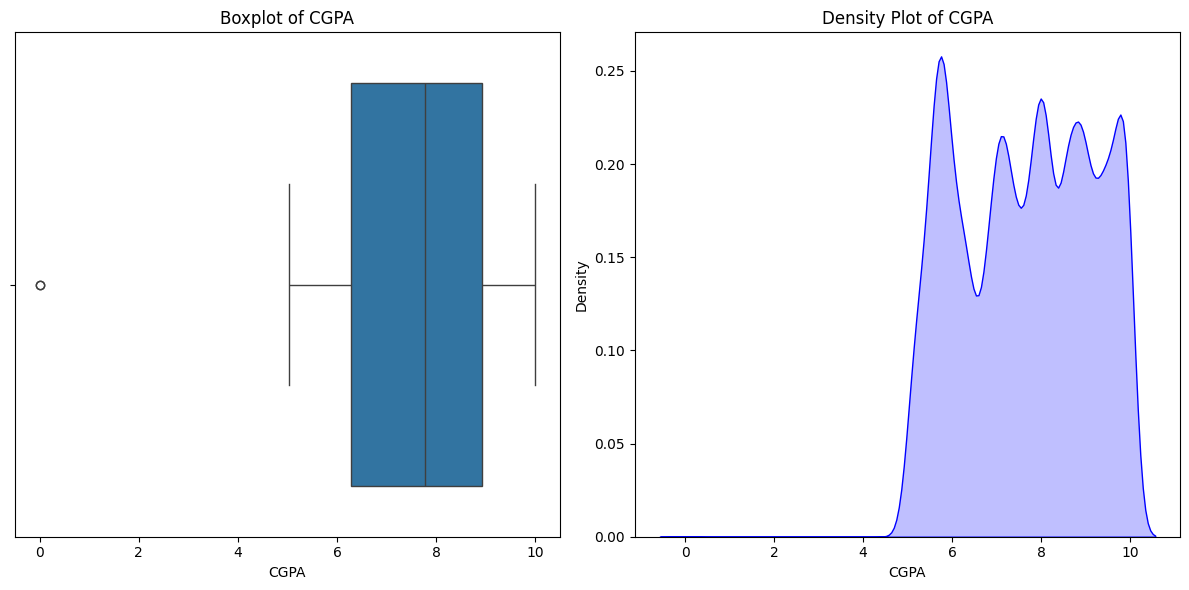

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variable name
var_name = 'CGPA'  # Replace with your actual variable name

# Create the figure for both plots
plt.figure(figsize=(12, 6))

# Create subplot for the boxplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.boxplot(data=df, x=var_name)  # Removed palette argument
plt.title(f'Boxplot of {var_name}')
plt.xlabel(var_name)

# Create subplot for the density plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=var_name, fill=True, color='b')  # Replaced shade=True with fill=True
plt.title(f'Density Plot of {var_name}')
plt.xlabel(var_name)

# Display the plots
plt.tight_layout()
plt.show()

In [296]:
# Descriptive statistics
print(f"Descriptive Statistics for {var_name}:")
print(df[var_name].describe())

Descriptive Statistics for CGPA:
count    27717.000000
mean         7.658769
std          1.465763
min          0.000000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64


COMMENT: As we can see, the CGPA distribution presents some outliers. It is better to remove them since they can strongly affect the models performances. 

In [297]:
# Remove outliers
# Calculate Q1, Q3, and IQR
Q1 = df['CGPA'].quantile(0.25)
Q3 = df['CGPA'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check how many outliers are outside of these bounds before filtering
outliers_before = df[(df['CGPA'] < lower_bound) | (df['CGPA'] > upper_bound)]
print("Number of outliers before filtering:", len(outliers_before))

# Now, filter the outliers
df = df[(df['CGPA'] >= lower_bound) & (df['CGPA'] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", df.shape)

# Check the min and max of 'CGPA' again
print("Min CGPA after removing outliers:", df['CGPA'].min())
print("Max CGPA after removing outliers:", df['CGPA'].max())

# Check if any outliers are still present
outliers_after = df[(df['CGPA'] < lower_bound) | (df['CGPA'] > upper_bound)]
print("Number of outliers after filtering:", len(outliers_after))

Number of outliers before filtering: 2
Shape after removing outliers: (27715, 15)
Min CGPA after removing outliers: 5.03
Max CGPA after removing outliers: 10.0
Number of outliers after filtering: 0


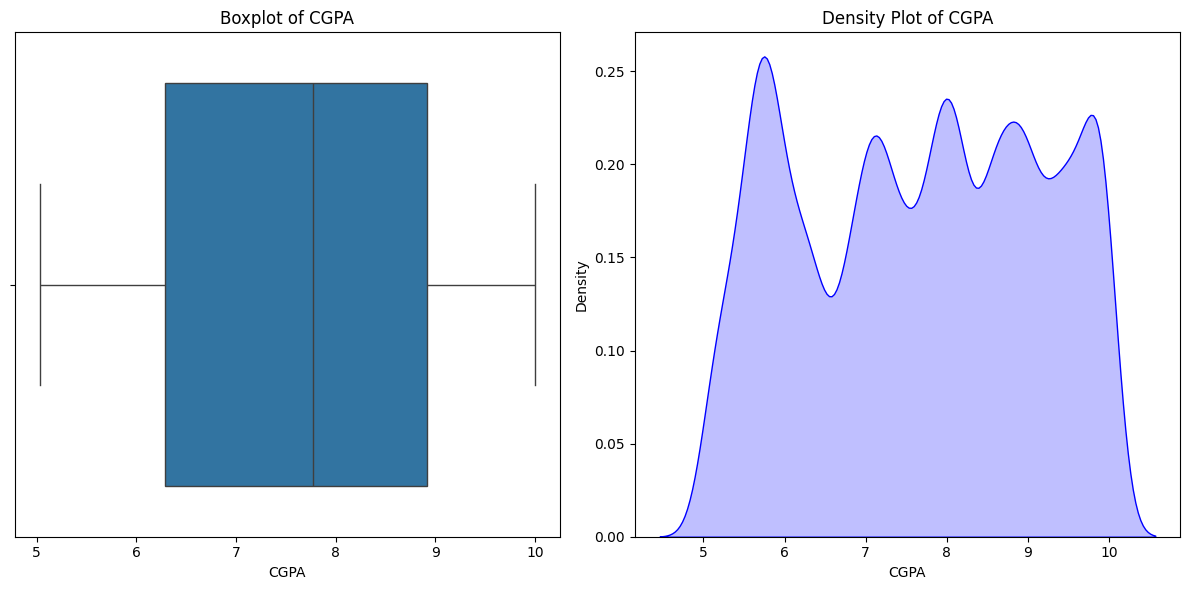

In [298]:
# Look again at the distribution of 'CGPA' to see how it is changed
# Variable name
var_name = 'CGPA'

# Create the figure for both plots
plt.figure(figsize=(12, 6))

# Create subplot for the boxplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.boxplot(data=df, x=var_name)  # Boxplot for CGPA
plt.title(f'Boxplot of {var_name}')
plt.xlabel(var_name)

# Create subplot for the density plot
plt.subplot(1, 2, 2)  # (rows, columns, index)
sns.kdeplot(data=df, x=var_name, fill=True, color='b')  # Density plot for CGPA
plt.title(f'Density Plot of {var_name}')
plt.xlabel(var_name)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

COMMENT: Now the distribution of CGPA is no more skewed and it doesn't present outliers, but it has peaks, that can cause overfitting. We can apply so transformations to data to try solving the problem. 

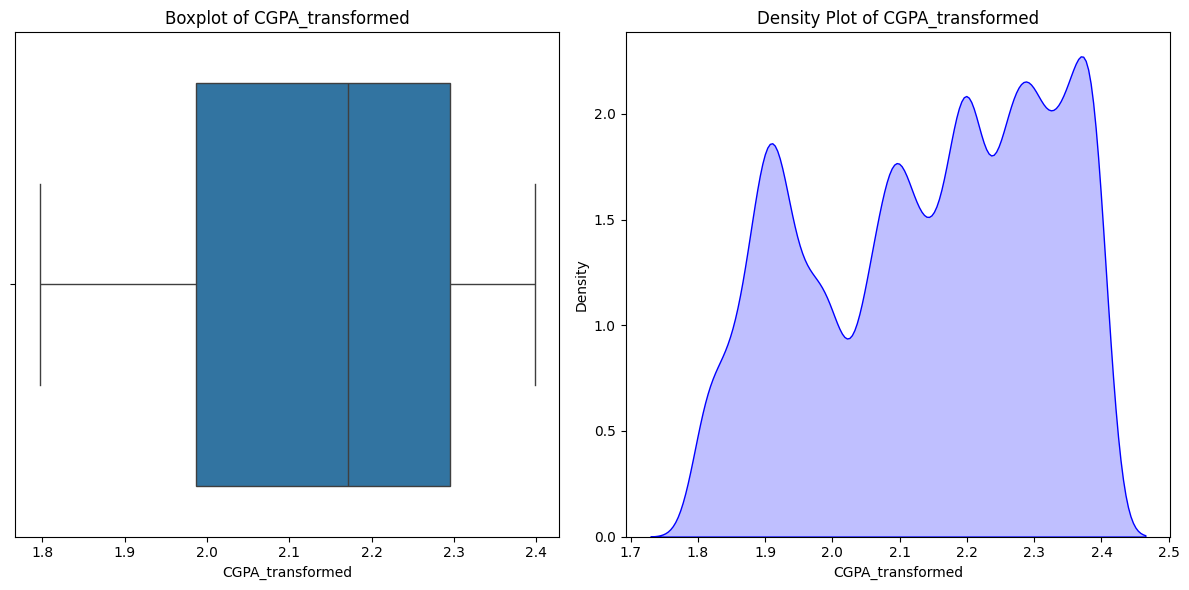

In [299]:
# Transform the CGPA variable applying the logaritmic scale
df['CGPA_transformed'] = np.log(df['CGPA'] + 1)  # +1 to avoid divisions per 0
df.shape
df.columns

# Check the transformation has correctly occurred
# Define the variable name
var_name = 'CGPA_transformed'  # Replace with your actual variable name

# Create the figure for both plots
plt.figure(figsize=(12, 6))

# Create subplot for the boxplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.boxplot(data=df, x=var_name)  # Removed palette argument
plt.title(f'Boxplot of {var_name}')
plt.xlabel(var_name)

# Create subplot for the density plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=var_name, fill=True, color='b')  # Replaced shade=True with fill=True
plt.title(f'Density Plot of {var_name}')
plt.xlabel(var_name)

# Display the plots
plt.tight_layout()
plt.show()

COMMENT: unfortunately, the peaks still remain. So, it is more convenient to keep the data as before and convert the variable from a quantitative numeric to a numeric discrete. This can help improve model performance or make the interpretation easier. Let's drop the CGPA_transformed variable and discretize CGPA.  

In [300]:
# Remove the column from the dataframe
df = df.drop('CGPA_transformed', axis=1) 
print(df.columns)
df.shape

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Suicidal Thoughts', 'Study Hours', 'Financial Stress',
       'Mental History', 'Depression', 'Education Level', 'Faculty'],
      dtype='object')


(27715, 15)

#### Discretize the CGPA variable creating CGPA_category and drop CGPA

In [301]:
# Discretize the CGPA into 6 bins
bins = [5, 6, 7, 8, 9, 10]  # Define the bin edges (e.g., CGPA ranges)
labels = [5.5, 6.5, 7.5, 8.5, 9.5]  # Labels for the bins

df['CGPA_category'] = pd.cut(df['CGPA'], bins=bins, labels=labels, include_lowest=True)

print(df)

       Gender  Age           City  Academic Pressure  CGPA  \
0        Male   33  Visakhapatnam                  5  8.97   
1      Female   24      Bangalore                  2  5.90   
2        Male   31       Srinagar                  3  7.03   
3      Female   28       Varanasi                  3  5.59   
4      Female   25         Jaipur                  4  8.13   
...       ...  ...            ...                ...   ...   
27802  Female   27          Surat                  5  5.75   
27803    Male   27       Ludhiana                  2  9.40   
27804    Male   31      Faridabad                  3  6.61   
27805  Female   18       Ludhiana                  5  6.88   
27806    Male   27          Patna                  4  9.24   

       Study Satisfaction     Sleep Duration Dietary Habits Suicidal Thoughts  \
0                       2          5-6 hours        Healthy               Yes   
1                       5          5-6 hours       Moderate                No   
2           

In [302]:
df.drop('CGPA', axis=1, inplace=True)
df.shape

(27715, 15)

#### Check the data balance
The dataset should have an equal number of observations assigned to the two categories of the responde variable. 

Balance of the response variable (Depression):


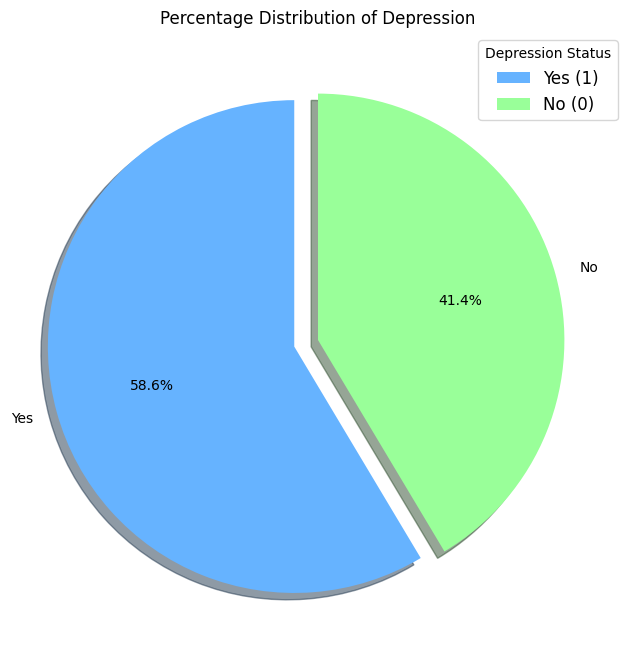

In [303]:
#### Balance Check
# Check the balance of the response variable (Depression)
print("Balance of the response variable (Depression):")
depression_counts = df["Depression"].value_counts()
depression_percentages = depression_counts / depression_counts.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(
    depression_percentages, 
    labels=['Yes', 'No'],  # Custom labels for the classes (0 = No, 1 = Yes)
    autopct='%1.1f%%',  # Show percentages with 1 decimal point
    colors=['#66b3ff', '#99ff99'],  # Optional: customize colors
    startangle=90,  # Start angle for better orientation
    explode=(0.1, 0),  # Optional: explode the first slice slightly
    shadow=True  # Optional: add shadow for better visualization
)

# Add a legend
plt.legend(
    labels=['Yes (1)', 'No (0)'],  # Legend showing the class labels
    title="Depression Status",  # Title for the legend
    loc="best",  # Location of the legend
    fontsize=12  # Font size for the legend
)

# Add title
plt.title("Percentage Distribution of Depression")

# Show the pie chart
plt.show()

COMMENT: When working with imbalanced datasets, machine learning models may be biased towards the majority class, leading to poor performance in predicting the minority class. This is especially problematic in classification tasks where accurately predicting both classes is essential. Techniques like oversampling, undersampling, or SMOTE can help balance the dataset by increasing the minority class's representation. Balancing is necessary for models to learn both classes effectively and to improve metrics like precision, recall, and F1-score, which are crucial for accurate predictions in imbalanced settings. 

In [304]:
#### CHOOSE THE BALANCING TECHNIQUE
# Calculate the difference between the two categories
difference = depression_counts.get(1, 0) - depression_counts.get(0, 0)
print("Difference between the two classes (Depression=1 and Depression=0):", difference)

Difference between the two classes (Depression=1 and Depression=0): 4755


COMMENT: There is a difference of 4743 between the two classes, meaning that class 1 (Depression = Yes) is significantly overrepresented compared to class 0 (Depression = No). It suggests that the dataset is imbalanced in favor of class 1.
Firstly, we apply the undersampling technique. Its drawback is the probable loss of valuable data from the majority class, which might reduce the model's ability to generalize.

#### Dataset balancing adopting the undersampling technique

In [305]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#### UNDERSAMPLING for the majority class 1, meaning suffering from depression
# Separate features (X) and target variable (y)
X = df.drop(columns=["Depression"])  # All columns except 'Depression' 
y = df["Depression"]  # Target variable

# Get the number of instances in the majority class (class 0)
majority_class_count = len(y[y == 0])

# Apply undersampling to balance the classes by setting class 1 to the same size as class 0
undersampler = RandomUnderSampler(sampling_strategy={1: majority_class_count}, random_state=42) # to grant results reproducibility 

# Resample the dataset
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after undersampling:", Counter(y_undersampled))

Class distribution after undersampling: Counter({0: 11480, 1: 11480})


In [306]:
# Recreate the Dataframe
df_undersampled = pd.DataFrame(X_undersampled, columns=X.columns)  
df_undersampled["Depression"] = y_undersampled 
df_undersampled.shape

(22960, 15)

In [307]:
print(df_undersampled)

       Gender  Age           City  Academic Pressure  Study Satisfaction  \
1      Female   24      Bangalore                  2                   5   
2        Male   31       Srinagar                  3                   5   
4      Female   25         Jaipur                  4                   3   
5        Male   29           Pune                  2                   3   
6        Male   30          Thane                  3                   4   
...       ...  ...            ...                ...                 ...   
27672  Female   28          Patna                  3                   4   
6410     Male   28         Bhopal                  5                   3   
3703   Female   31  Visakhapatnam                  5                   1   
11430    Male   23        Kolkata                  3                   1   
15167  Female   28          Surat                  3                   3   

          Sleep Duration Dietary Habits Suicidal Thoughts  Study Hours  \
1            

#### Check the distribution of the categorical and dicrete variables (all the variables)
After the data balancing

In [308]:
df_undersampled.dtypes

Gender                  object
Age                      int64
City                    object
Academic Pressure        int32
Study Satisfaction       int32
Sleep Duration          object
Dietary Habits          object
Suicidal Thoughts       object
Study Hours              int32
Financial Stress         int32
Mental History          object
Education Level         object
Faculty                 object
CGPA_category         category
Depression               int64
dtype: object

In [309]:
# Identify categorical variables and integer variables
categorical_columns = df_undersampled.select_dtypes(include=['object', 'category']).columns
integer_columns = df_undersampled.select_dtypes(include=['int64', 'int32']).columns

# Function to display frequency of categories for each variable
def display_frequency(df, columns):
    for col in columns:
        print(f"Frequency for the variable '{col}':")
        print(df[col].value_counts())
        print("\n" + "-"*40 + "\n")

# Display frequencies for categorical variables
print("Categorical variables frequencies:\n")
display_frequency(df_undersampled, categorical_columns)

# Display frequencies for integer variables
print("Integer variables frequencies:\n")
display_frequency(df_undersampled, integer_columns)

Categorical variables frequencies:

Frequency for the variable 'Gender':
Gender
Male      12785
Female    10175
Name: count, dtype: int64

----------------------------------------

Frequency for the variable 'City':
City
Kalyan           1311
Srinagar         1136
Hyderabad        1060
Vasai-Virar      1054
Lucknow           970
Thane             936
Ludhiana          922
Agra              922
Surat             891
Jaipur            868
Kolkata           853
Patna             827
Visakhapatnam     803
Pune              796
Ahmedabad         758
Bhopal            756
Chennai           728
Meerut            682
Rajkot            666
Delhi             639
Bangalore         625
Ghaziabad         608
Vadodara          584
Varanasi          581
Mumbai            578
Nagpur            548
Indore            518
Kanpur            506
Nashik            449
Faridabad         385
Name: count, dtype: int64

----------------------------------------

Frequency for the variable 'Sleep Duration':
Sleep

COMMENT: Those data are ready for being used for machine leaning analysis. Let's save the data and do some descriptive statistics analysis before applying machine learning models to them. 

In [310]:
# Save to csv
df_undersampled.to_csv('Student_depression_undersampled.csv', index=False)

### DESCRIPTIVE STATISTICS

The descriptive statistic is used to summarize and describe the main characteristics of a dataset in a clear and understandable way. It provides a preliminary analysis of the data, offering an immediate understanding of its key trends and distributions. 

#### Upload the dataset

In [354]:
depdf = pd.read_csv('Student_depression_undersampled.csv')
depdf.columns
depdf.shape
depdf.dtypes

Gender                 object
Age                     int64
City                   object
Academic Pressure       int64
Study Satisfaction      int64
Sleep Duration         object
Dietary Habits         object
Suicidal Thoughts      object
Study Hours             int64
Financial Stress        int64
Mental History         object
Education Level        object
Faculty                object
CGPA_category         float64
Depression              int64
dtype: object

#### Analysis of the categorical and dicrete variables

Non-binary categorical columns: ['City', 'Sleep Duration', 'Dietary Habits', 'Education Level', 'Faculty']


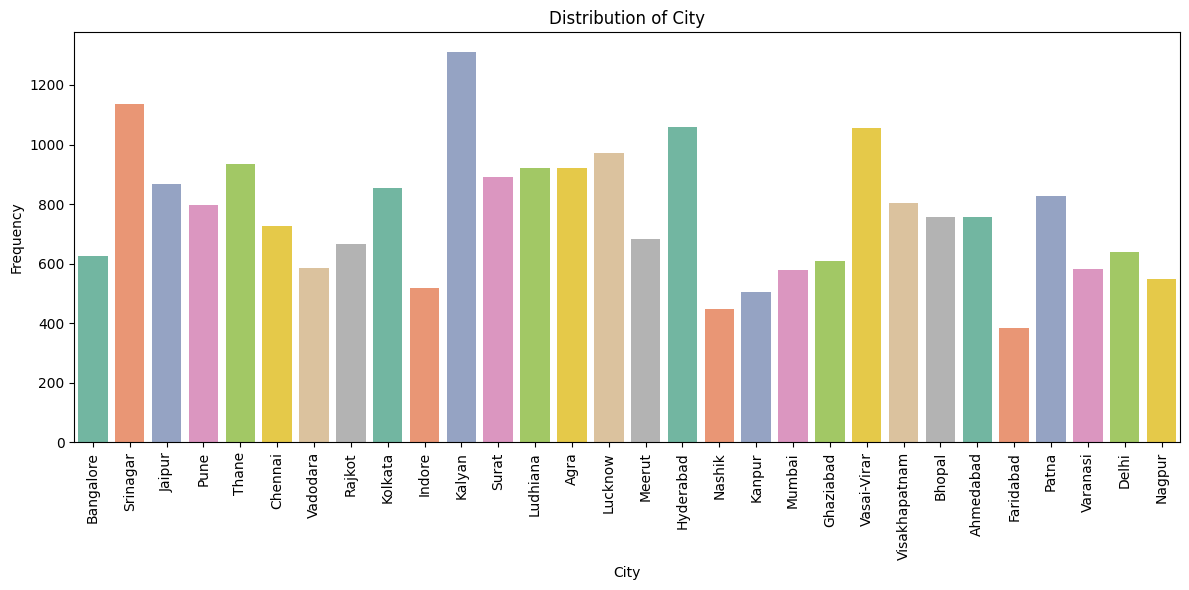

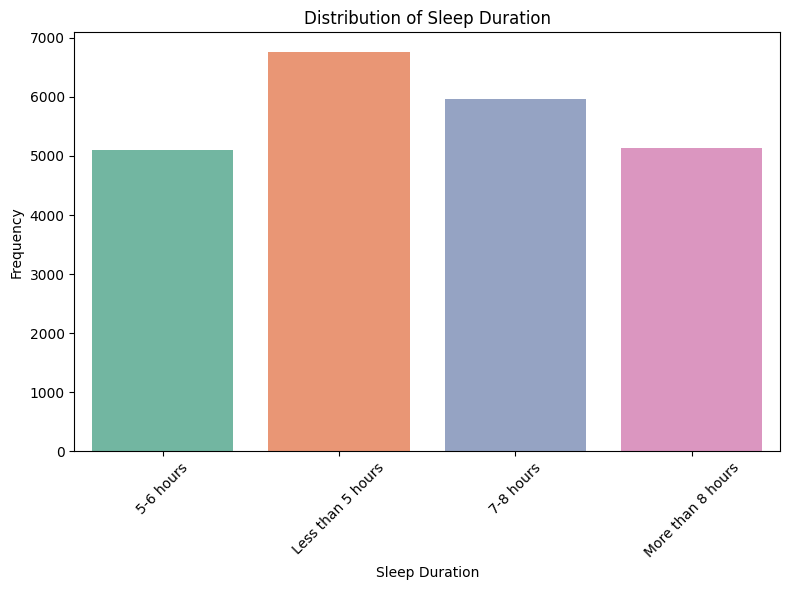

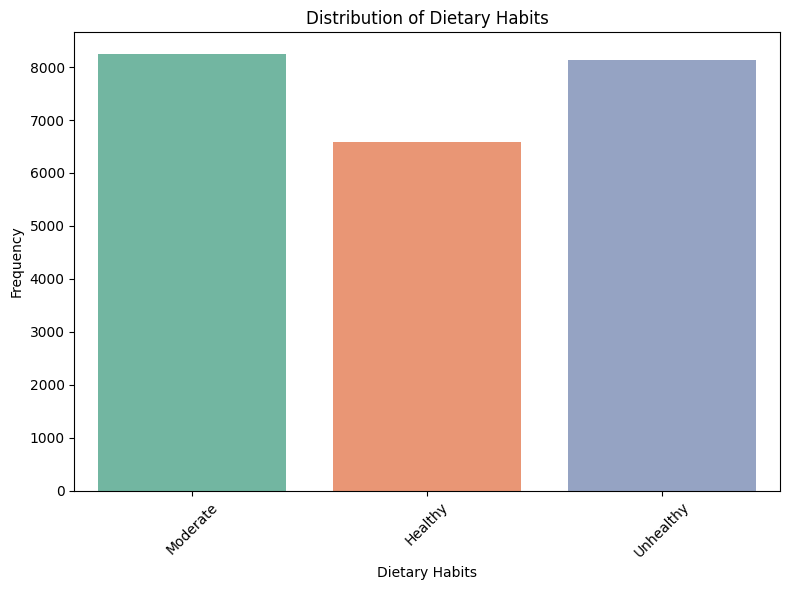

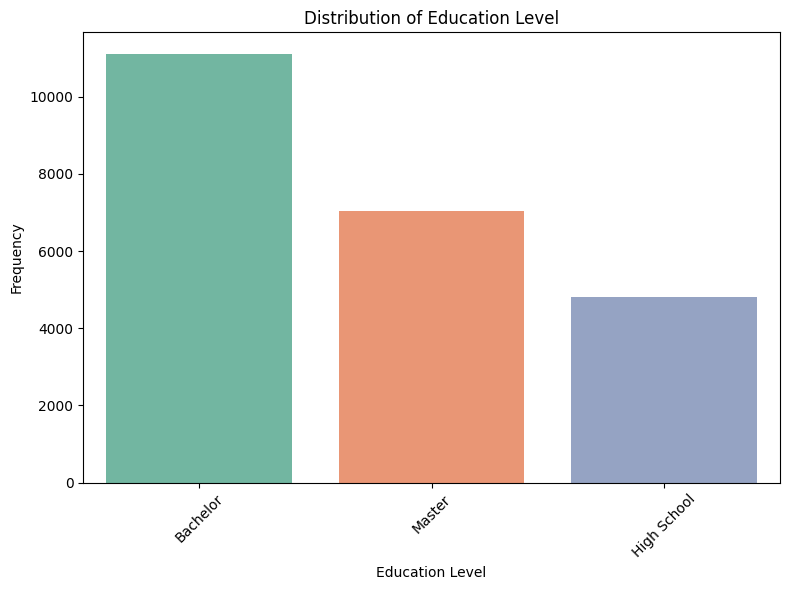

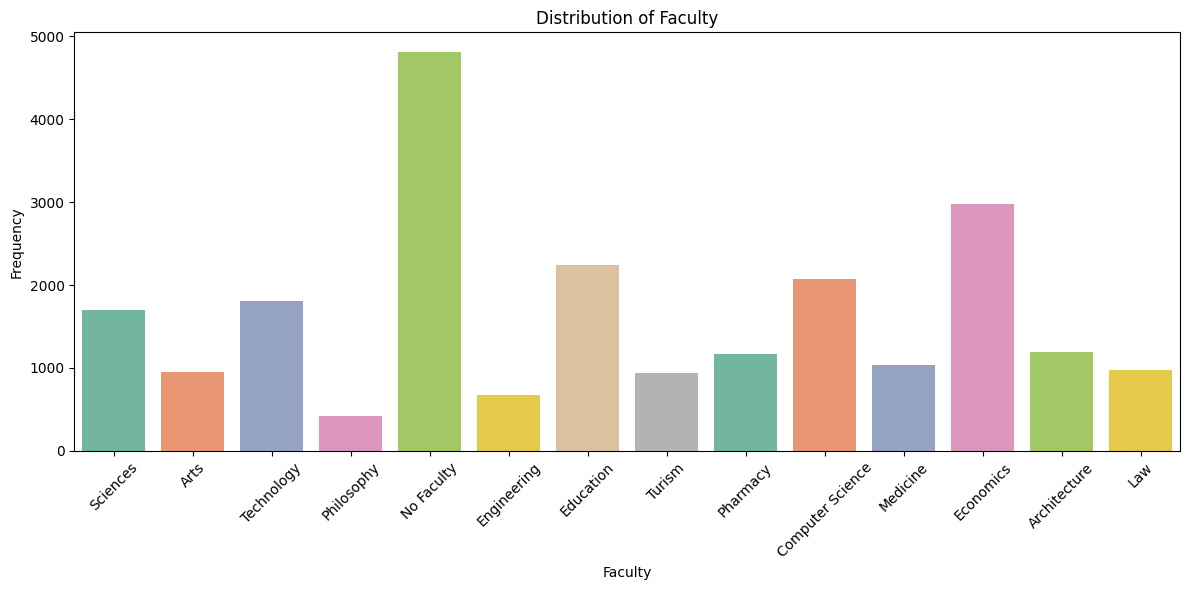

In [355]:
# Automatically select categorical (object and category) and integer (int32) columns
categorical_columns = depdf.select_dtypes(include=['object', 'category']).columns
discrete_columns = depdf.select_dtypes(include=['int32']).columns

# Exclude binary variables from the categorical columns
# Binary variables are those with only 2 unique values
non_binary_categorical_columns = [col for col in categorical_columns if depdf[col].nunique() > 2]
print("Non-binary categorical columns:", non_binary_categorical_columns)

# Combine both non-binary categorical and discrete columns
selected_columns = list(non_binary_categorical_columns) + list(discrete_columns)

# Iterate through the selected columns and generate count plots
for column in selected_columns:
    # Set figure size depending on the column
    fig_size = (12, 6) if column in ["City", "Faculty"] else (8, 6)
    plt.figure(figsize=fig_size)  
    
    # Generate the count plot with hue=column (color the bars based on the values of the column)
    sns.countplot(data=df_undersampled, x=column, hue=column, palette="Set2", legend=False)  # Explicitly set hue=column
    
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Adjust x-ticks for readability (rotate if there are long labels like city names)
    if column == "City":
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()  # This helps in adjusting labels and title positions
    plt.show()

#### Analysis of binary variables

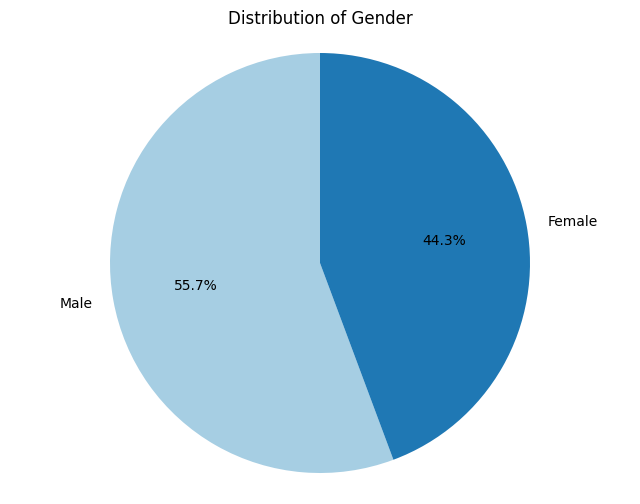

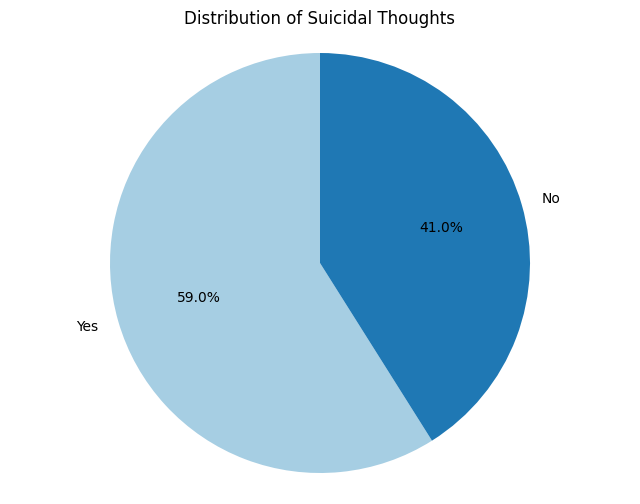

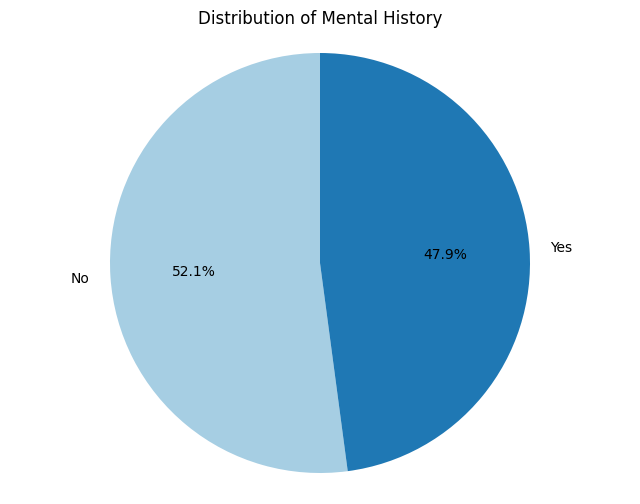

In [356]:
# Automatically select binary columns (categorical columns with only 2 unique values)
binary_columns = [col for col in categorical_columns if depdf[col].nunique() == 2]

# Iterate through the binary columns and generate pie charts
for column in binary_columns:
    # Calculate the value counts of the binary variable
    value_counts = depdf[column].value_counts()
    plt.figure(figsize=(8, 6))
    palette = sns.color_palette("Paired", n_colors=2)
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f"Distribution of {column}")
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    # Show plot
    plt.show()

#### Analysis of the percentage of individuals with depression across each level of the specified variable

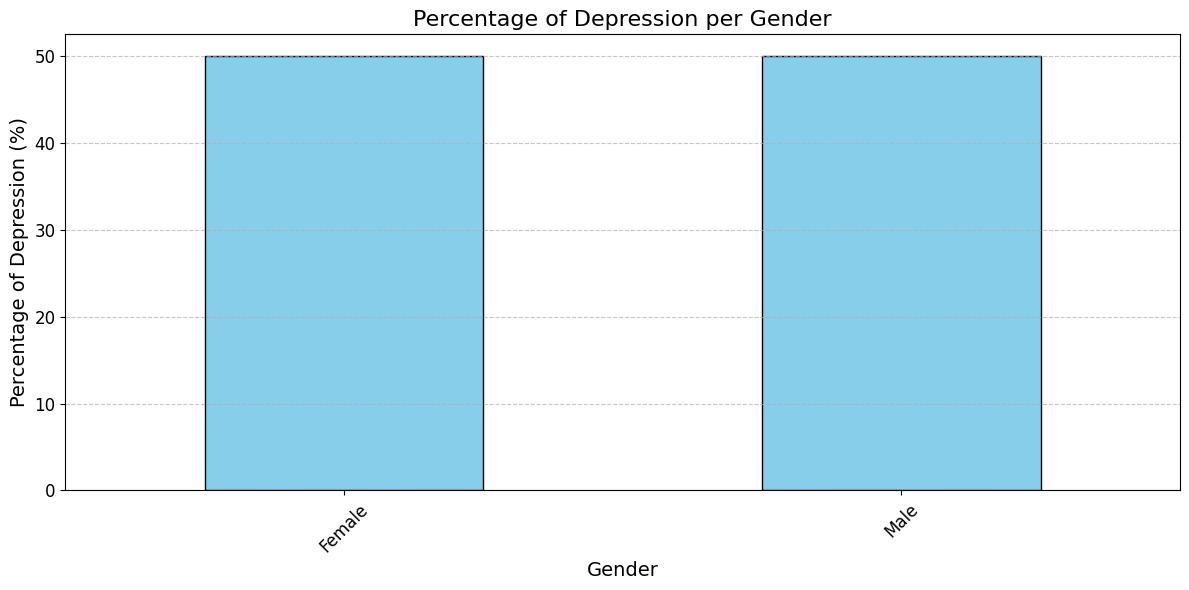

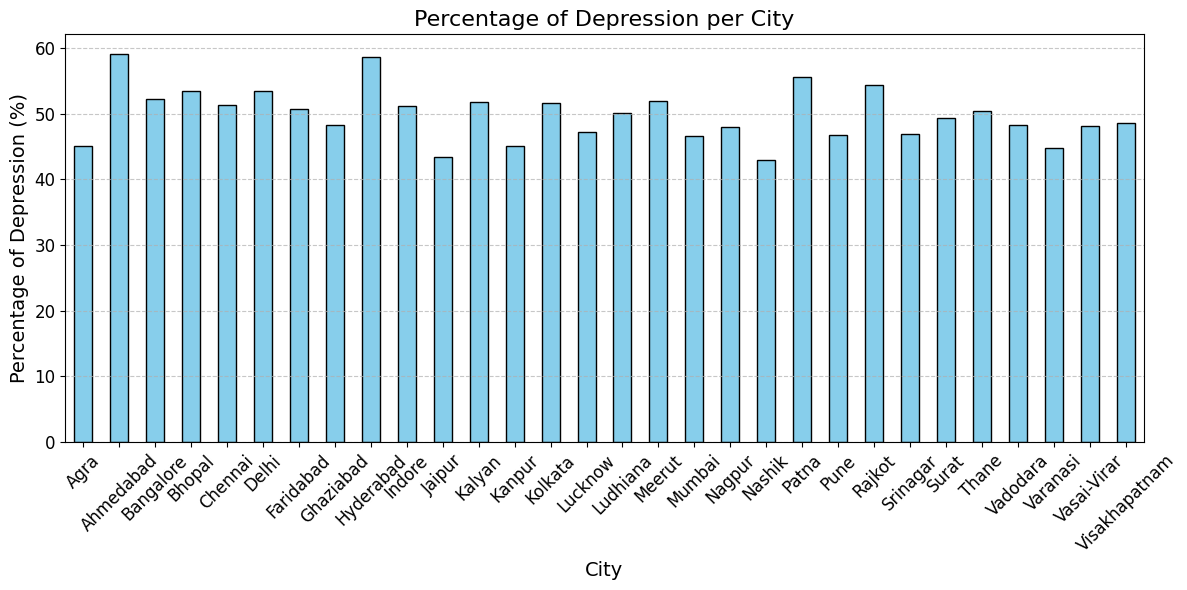

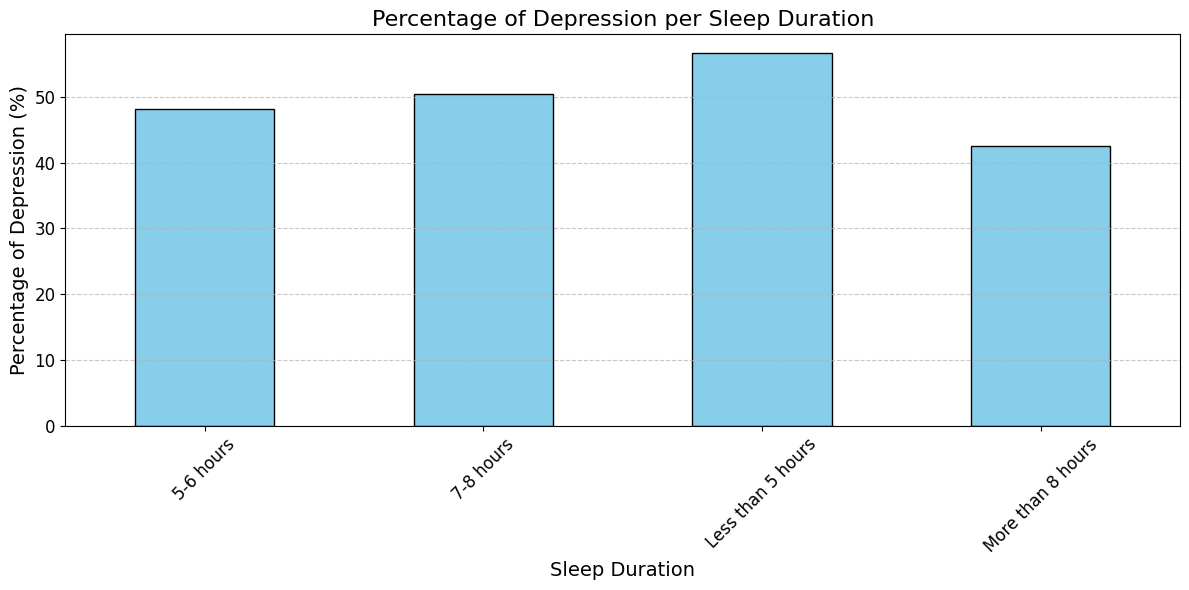

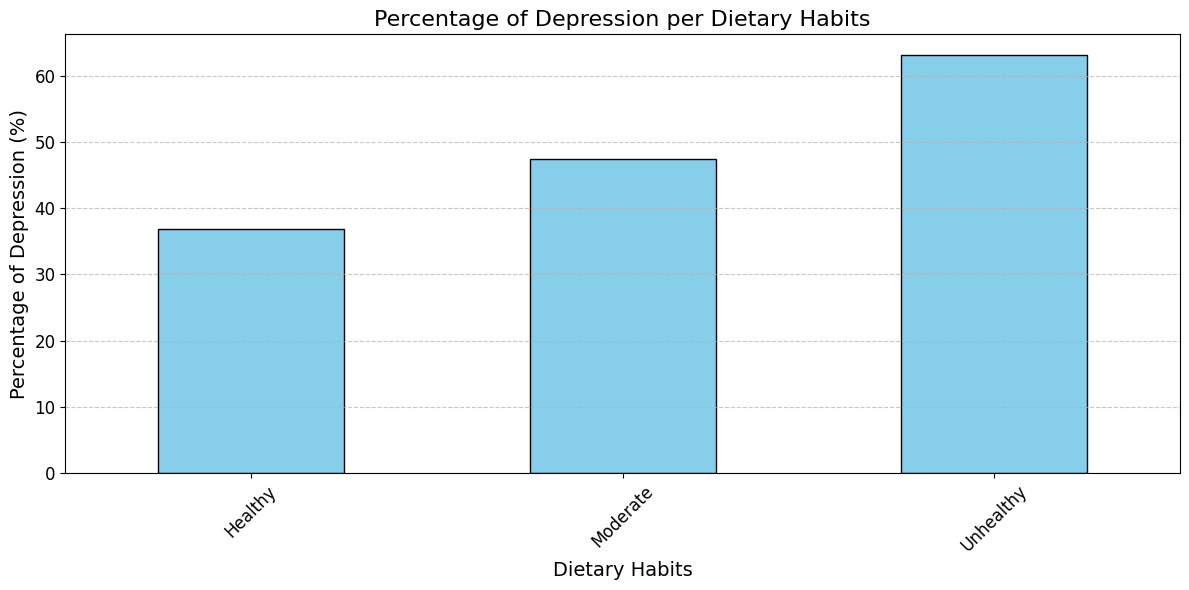

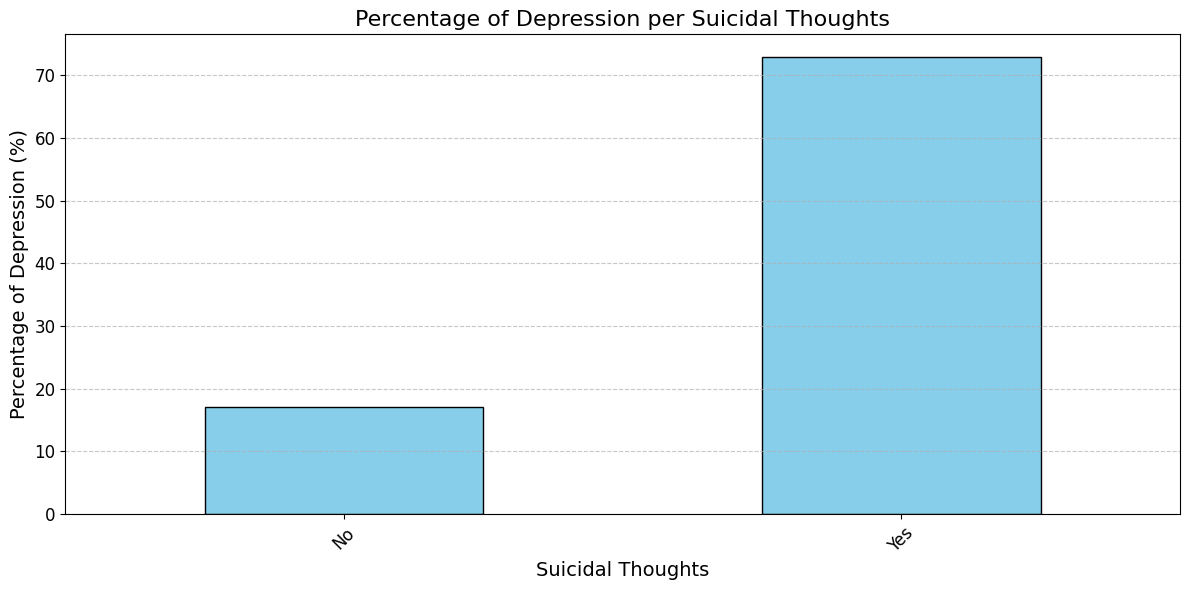

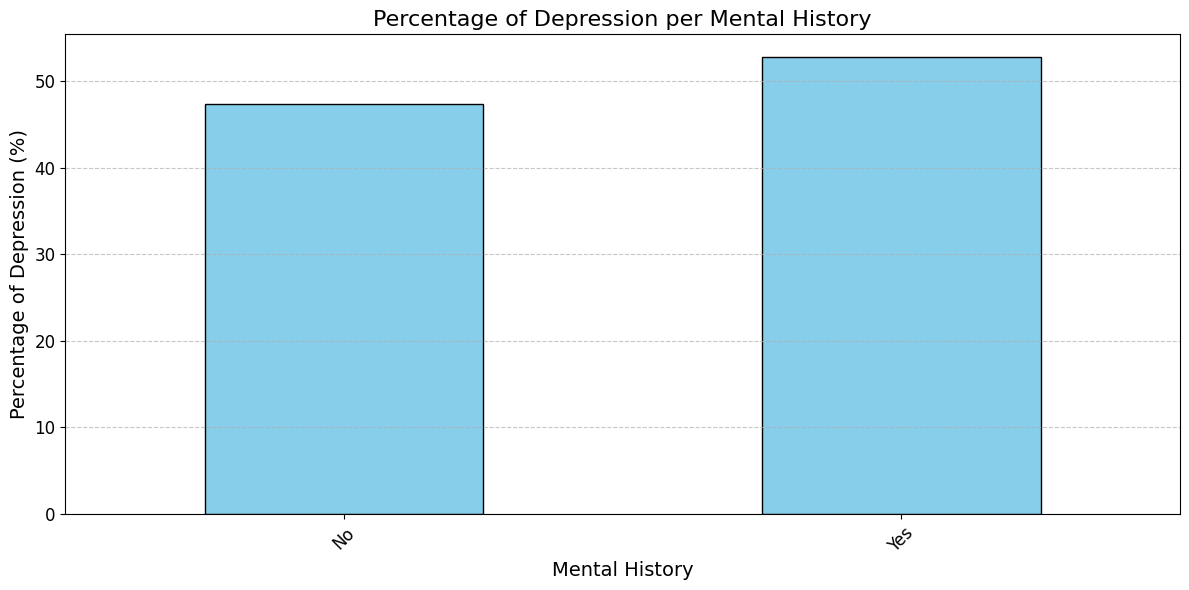

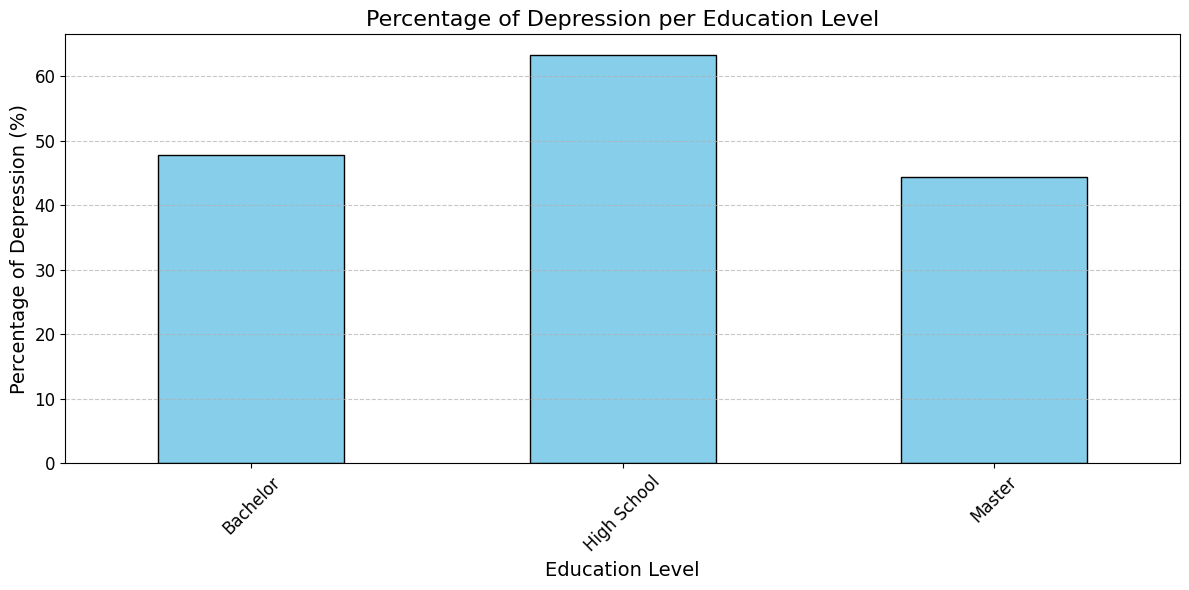

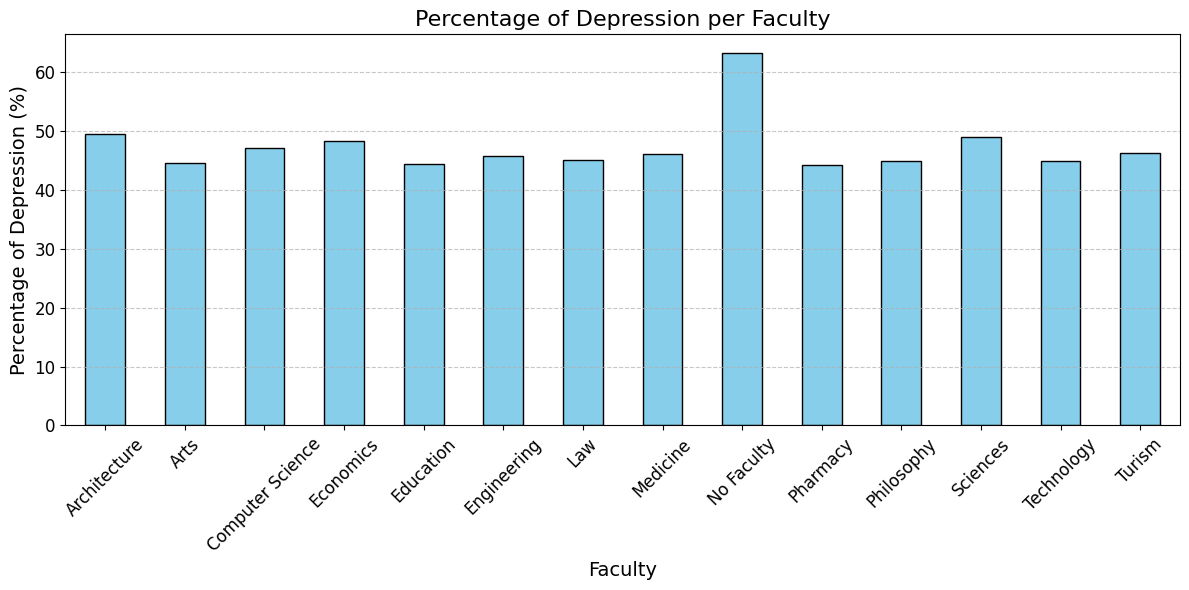

In [357]:
import pandas as pd
import matplotlib.pyplot as plt

def percent_depression(var:str, data:pd.DataFrame):
    """
    Function to calculate the percentage of depression based on a specified variable in a DataFrame.

    Args:
        var (str): The name of the column to analyze in the DataFrame.
        data (pd.DataFrame): The DataFrame containing the data to analyze.

    Returns:
        None: It generates and shows a bar plot.
    """
    # Calcola la percentuale di individui con depressione per ogni livello della variabile
    total = data.groupby(var).count()['Depression']
    counts = data[data['Depression'] == 1].groupby(var)['Depression'].count()
    percentage = (counts / total) * 100
    
    # Genera il grafico a barre
    plt.figure(figsize=(12, 6))
    percentage.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Percentage of Depression per {var}", fontsize=16)
    plt.xlabel(f"{var}", fontsize=14)
    plt.ylabel("Percentage of Depression (%)", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Layout del grafico
    plt.tight_layout()
    plt.show()

# Selezionare automaticamente le variabili categoriche, binarie o discrete
categorical_columns = depdf.select_dtypes(include=['object', 'category']).columns
discrete_columns = depdf.select_dtypes(include=['int32']).columns

# Unire le variabili categoriche, binarie e discrete
selected_columns = categorical_columns.append(discrete_columns)

# Iterare sulle colonne selezionate e generare i grafici
for column in selected_columns:
    percent_depression(column, data=depdf)

COMMENT: A difference in the height of the bars suggests a potential relationship between the independent variable (e.g., City, Study Hours) and the target variable (Depression), indicating varying depression percentages across different levels of the variable. A larger difference may imply a more pronounced variation in depression rates. However, to assess whether a variable significantly influences depression (i.e., explains the variation in Depression), statistical tests, like t-tests and Chi-tests are necessary. 

#### Chi-test for categorical and binary variables

For categorical variables, the Chi-squared test is used to assess the dependency between the independent variable and the binary response variable (Depression). This test evaluates whether the distribution of depression rates differs across the categories of the independent variable.

In [358]:
import scipy.stats as stats

# Select categorical variables
categorical_columns = depdf.select_dtypes(include=['object', 'category']).columns

# Initialize a list to store results
results = []

# Perform Chi-squared test for each categorical variable against 'Depression'
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(depdf[column], depdf['Depression'])
    
    # Perform the Chi-squared test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Store results
    results.append({'Variable': column, 'Chi2 Stat': chi2_stat, 'p-value': p_value})

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Function to format both variable names and p-values in bold if p-value < 0.05
def highlight_significant(row):
    style = ['' for _ in row]
    if row['p-value'] < 0.05:
        style[0] = 'font-weight: bold'  # Variable name in bold
        style[2] = 'font-weight: bold'  # p-value in bold
    return style

# Apply formatting to both 'Variable' and 'p-value' columns based on 'p-value' condition
styled_results = results_df.style.apply(highlight_significant, axis=1)

# Display the styled table
styled_results

,Variable,Chi2 Stat,p-value
0,Gender,0.000000,1.000000
1,City,146.094293,0.000000
2,Sleep Duration,242.283840,0.000000
3,Dietary Habits,1036.830868,0.000000
4,Suicidal Thoughts,6918.558918,0.000000
5,Mental History,66.010190,0.000000
6,Education Level,448.965336,0.000000
7,Faculty,453.582257,0.000000


#### t-test for continuous or discrete variables

For continuous or discrete variables (e.g., Study Hours, Age), the t-test is suitable for comparing the mean depression levels between the two groups (depressed vs. non-depressed). This test assesses whether there is a significant difference in the means of depression across the groups defined by the independent variable.

In [359]:
import scipy.stats as stats

# Select discrete (integer) variables excluding 'Depression'
discrete_columns = depdf.select_dtypes(include=['int64']).columns.tolist()
discrete_columns = [col for col in discrete_columns if col != 'Depression']

# Initialize a list to store results
results = []

# Perform T-test for each discrete variable against 'Depression' (binary target variable)
for column in discrete_columns:
    # Separate the data into two groups based on the 'Depression' variable (0 and 1)
    group_0 = depdf[depdf['Depression'] == 0][column]
    group_1 = depdf[depdf['Depression'] == 1][column]
    
    # Perform the T-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)  # Welch's t-test
    
    # Store results
    results.append({'Variable': column, 'T-stat': t_stat, 'p-value': p_value})

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Function to format both variable names and p-values in bold if p-value < 0.05
def highlight_significant(row):
    style = ['' for _ in row]
    if row['p-value'] < 0.05:
        style[0] = 'font-weight: bold'  # Variable name in bold
        style[2] = 'font-weight: bold'  # p-value in bold
    return style

# Apply formatting to both 'Variable' and 'p-value' columns based on 'p-value' condition
styled_results = results_df.style.apply(highlight_significant, axis=1)

# Display the styled table
styled_results

,Variable,T-stat,p-value
0,Age,35.547476,0.000000
1,Academic Pressure,-82.869042,0.000000
2,Study Satisfaction,26.768047,0.000000
3,Study Hours,-32.132573,0.000000
4,Financial Stress,-59.483563,0.000000


COMMENT: The **Chi-squared test** results align with the graphical analysis, confirming that Gender is the only variable without a significant association with the binary response variable, Depression. This conclusion is supported by its p-value exceeding the 0.05 threshold, indicating insufficient statistical evidence to suggest a relationship between Gender and Depression. In other words, the distribution of Depression does not significantly differ across gender groups.    
These findings are further supported by the **t-tests** conducted on discrete variables. All p-values are below 0.05, indicating significant differences in the mean values of these variables between individuals with and without depression. This suggests that these factors may be associated with depression. However, we should not exclude variables basing solely on statistical tests. 

### PREDICTIVE STATISTICS

VARIABLE CONVERSION  
To refine the analysis, we can convert the ordinal categorical variable into discrete quantitative variable to provide order information in the execution of models. This is the encoding technique that enables keeping the information about the categories ordinability. 

In [360]:
# Define a function to apply ordinal mappings
def map_ordinal_values(depdf, column_mappings):
    for column, mapping in column_mappings.items():
        depdf[column] = depdf[column].map(mapping)

# Define mappings for ordinal variables
ordinal_mappings = {
    'Dietary Habits': {
        'Unhealthy': 1,  
        'Moderate': 2,           
        'Healthy': 3,                           
    },
    'Education Level': {
        'High School': 1,
        'Bachelor': 2, 
        'Master': 3,                                
    },
    'Sleep Duration': {
        'Less than 5 hours': 4,  
        '5-6 hours': 5.5,        
        '7-8 hours': 7.5,        
        'More than 8 hours': 9,            
    }
}

# Apply the mappings
map_ordinal_values(depdf, ordinal_mappings)

# Count and display unique values after mapping
for column in ordinal_mappings.keys():
    print(f"Unique values in '{column}' after mapping: {depdf[column].unique()}")

Unique values in 'Dietary Habits' after mapping: [2 3 1]
Unique values in 'Education Level' after mapping: [2 3 1]
Unique values in 'Sleep Duration' after mapping: [5.5 4.  7.5 9. ]


In [361]:
# Disable the downcasting warning
pd.set_option('future.no_silent_downcasting', True)

# Replace binary mappings
binary_mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'Mental History': {'Yes': 1, 'No': 0},
    'Suicidal Thoughts': {'Yes': 1, 'No': 0}
}

# Apply the mappings
depdf.replace(binary_mappings, inplace=True)

# Convert the columns to int after replacing the binary values
for column in binary_mappings.keys():
    depdf[column] = depdf[column].astype('int64')

# Count and display unique values for each column
for column in binary_mappings.keys():
    print(f"Unique values in '{column}' after mapping: {depdf[column].unique()}")

Unique values in 'Gender' after mapping: [1 0]
Unique values in 'Mental History' after mapping: [1 0]
Unique values in 'Suicidal Thoughts' after mapping: [0 1]


In [362]:
depdf.dtypes

Gender                  int64
Age                     int64
City                   object
Academic Pressure       int64
Study Satisfaction      int64
Sleep Duration        float64
Dietary Habits          int64
Suicidal Thoughts       int64
Study Hours             int64
Financial Stress        int64
Mental History          int64
Education Level         int64
Faculty                object
CGPA_category         float64
Depression              int64
dtype: object

COMMENT: TO apply the machine learning models such as Logistic model, Decision Tree, Random Forest and so on. It is necessay to one-hot encode the categorical variables (City and Faculty). 

In [363]:
# Apply One-Hot Encoding to 'City' and 'Faculty' columns (but keep 'Depression' as is)
X = pd.get_dummies(depdf.drop('Depression', axis=1), columns=['City', 'Faculty'], drop_first=True)

# Keep 'Depression' as the target variable (y)
y = depdf['Depression']

# Convert boolean columns to 1 and 0 (just in case you have any other boolean columns)
X = X.astype(int)

# Check the first few rows of the updated dataset
print(X.head())

   Gender  Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
0       1   24                  2                   5               5   
1       0   31                  3                   5               4   
2       1   25                  4                   3               5   
3       0   29                  2                   3               4   
4       0   30                  3                   4               7   

   Dietary Habits  Suicidal Thoughts  Study Hours  Financial Stress  \
0               2                  0            3                 2   
1               3                  0            9                 1   
2               2                  1            1                 1   
3               3                  0            4                 1   
4               3                  0            1                 2   

   Mental History  ...  Faculty_Education  Faculty_Engineering  Faculty_Law  \
0               1  ...                  0              

In [364]:
print(X.columns)

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Suicidal Thoughts', 'Study Hours',
       'Financial Stress', 'Mental History', 'Education Level',
       'CGPA_category', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat',
       'City_Thane', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Faculty_Arts', 'Faculty_Computer Science',
       'Faculty_Economics', 'Faculty_Education', 'Faculty_Engineering',
       'Faculty_Law', 'Faculty_Medicine', 'Faculty_No Faculty',
       'Faculty_Pharmacy', 'Faculty_Philosophy', 'Faculty_Sciences',
 

In [365]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
22955    1
22956    1
22957    1
22958    1
22959    1
Name: Depression, Length: 22960, dtype: int64


### Decision tree model

In [371]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of datasets
datasets = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}

# Loop through each dataset and print its shape
for dataset_name, dataset in datasets.items():
    print(f"Dimension of {dataset_name}: {dataset.shape}")

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Dimension of X_train: (18368, 54)
Dimension of X_test: (4592, 54)
Dimension of y_train: (18368,)
Dimension of y_test: (4592,)
Accuracy Score: 0.7665505226480837
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      2298
           1       0.77      0.76      0.76      2294

    accuracy                           0.77      4592
   macro avg       0.77      0.77      0.77      4592
weighted avg       0.77      0.77      0.77      4592



Confusion Matrix:
 [[1924  374]
 [ 350 1944]]


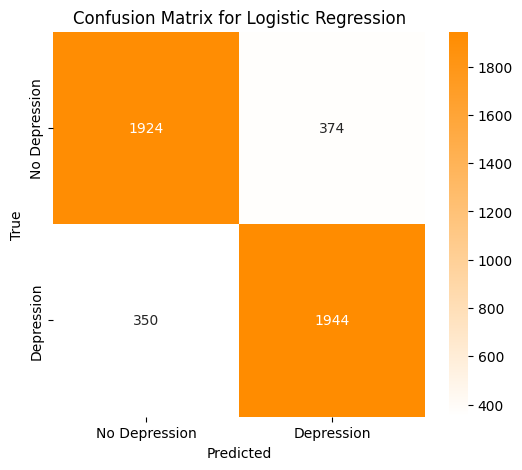

In [412]:
from sklearn.metrics import confusion_matrix
import matplotlib.colors as mcolors

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Create a custom colormap using 'darkorange'
cmap = mcolors.LinearSegmentedColormap.from_list("darkorange_map", ["white", "darkorange"])

# Plot the confusion matrix with the custom darkorange colormap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

COMMENT: The Decision Tree model achieved an **accuracy** of 76.7%, indicating good overall performance. For class 0 (no depression), **precision** was 0.76, **recall** was 0.78, and the **F1-score** was 0.77. For class 1 (depression), precision was 0.77, recall was 0.76, and the F1-score was 0.76. The macro and weighted averages for precision, recall, and F1-score were all 0.77, suggesting that the model performed similarly for both classes.

The **confusion matrix** shows that the model correctly predicted 1787 instances of class 0 and 1733 instances of class 1. However, it made 511 false positive errors, predicting depression when the actual label was no depression, and 561 false negative errors, where it failed to identify depression. While the model is more accurate at predicting class 1 (depression) due to a higher number of true positives, the performance is balanced overall, with no significant bias toward one class. These results demonstrate that the model is capable of handling both classes effectively with minor trade-offs in prediction accuracy.

ROC AUC Score: 0.8956004349333753


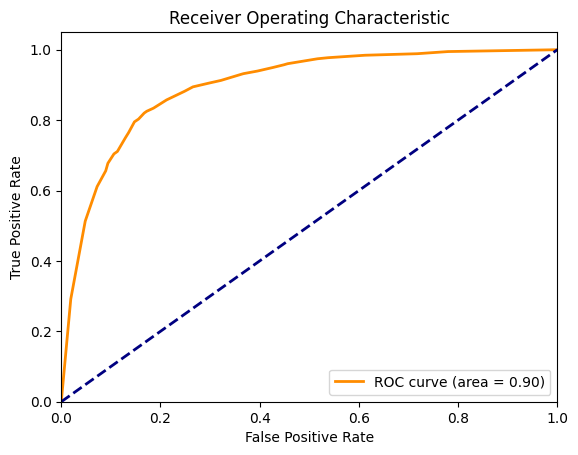

In [383]:
# Get the predicted probabilities for class 1 (positive class, i.e., 'depression')
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

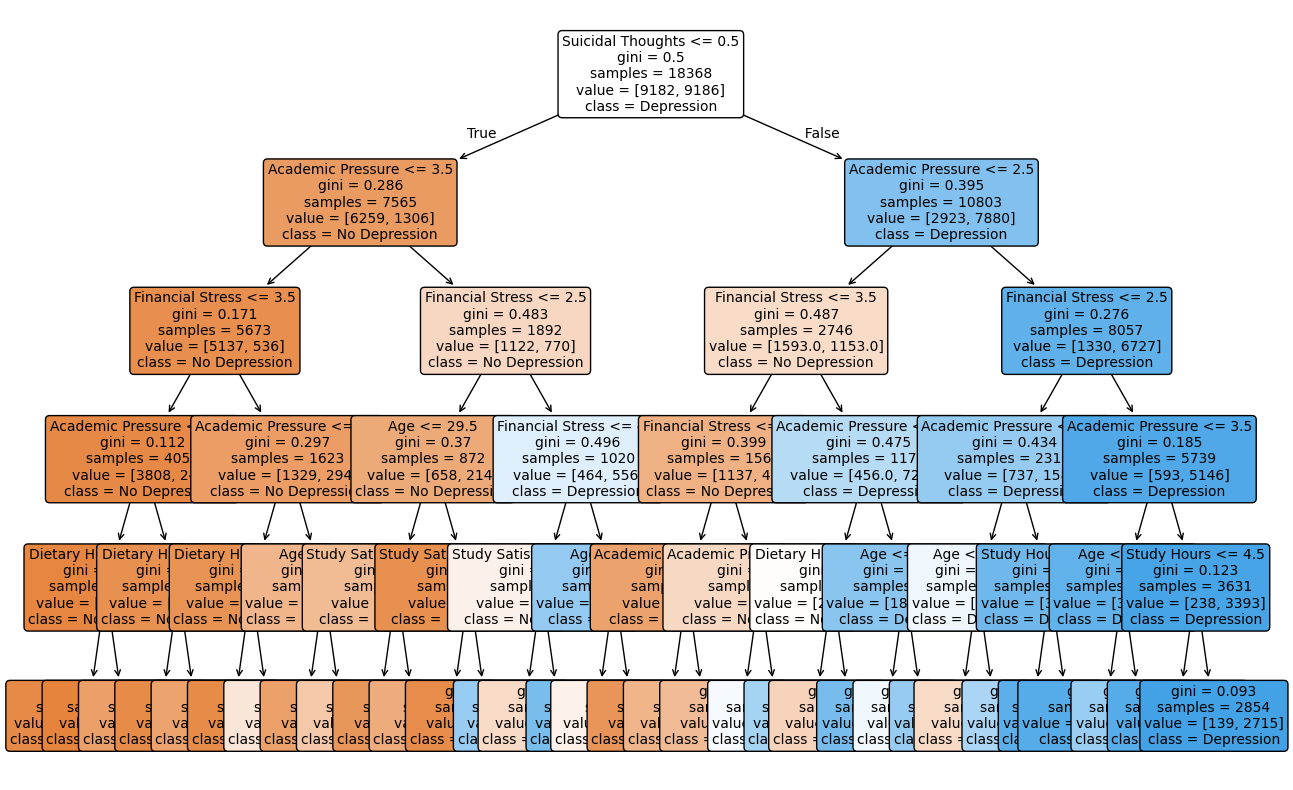

In [384]:
# Import necessary libraries for visualization
from sklearn.tree import plot_tree

# Initialize the Decision Tree classifier with max_depth to limit the tree size
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting to depth 5 (adjust as needed)

# Train the model
dt_model.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Depression', 'Depression'], rounded=True, fontsize=10)

# Save the Decision Tree as a PNG file
plt.savefig('decision_tree.png', format='png')

# Show the tree visualization
plt.show()

In [385]:
# Get the features that were used in the splits
features_used_in_tree = set(dt_model.tree_.feature)
print(f"Number of features used in the tree: {len(features_used_in_tree)}")

Number of features used in the tree: 8


In [409]:
# Getting feature importances
importances = dt_model.feature_importances_

# Create a DataFrame to display feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features based on their importance
print("Feature Importances based on model training:")
print(feature_importance_df)

# Get the tree object from the trained decision tree model
tree = dt_model.tree_

# Extract the feature indices used in the tree splits
used_feature_indices = tree.feature

# List of feature names that are used in the decision tree splits
used_feature_names = [X.columns[i] for i in used_feature_indices if i != -1]  # -1 means no split at this node

# Display the features used in the splits (in the order of splits)
print("\nFeatures used in decision tree splits (in order of splits):")
print(used_feature_names)

# Display each feature used at each decision node in the tree (in the order of decision):
print("\nDetailed features used at each node (in order of decision):")
for i, feature_idx in enumerate(used_feature_indices):
    if feature_idx != -1:  # Skip if there's no split at this node
        feature_name = X.columns[feature_idx]
        print(f"Node {i + 1}: Feature {feature_name}")

Feature Importances based on model training:
                     Feature  Importance
6          Suicidal Thoughts    0.598857
2          Academic Pressure    0.253280
8           Financial Stress    0.102590
1                        Age    0.024947
5             Dietary Habits    0.007329
7                Study Hours    0.007301
3         Study Satisfaction    0.005696
36                City_Thane    0.000000
40        City_Visakhapatnam    0.000000
39          City_Vasai-Virar    0.000000
38             City_Varanasi    0.000000
37             City_Vadodara    0.000000
0                     Gender    0.000000
35                City_Surat    0.000000
34             City_Srinagar    0.000000
42  Faculty_Computer Science    0.000000
33               City_Rajkot    0.000000
41              Faculty_Arts    0.000000
45       Faculty_Engineering    0.000000
43         Faculty_Economics    0.000000
44         Faculty_Education    0.000000
31                City_Patna    0.000000
46          

#### Random Forest

In [407]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # n_estimators = number of decision trees

# Train the model
rf_model.fit(X_train, y_train)  # Using X_train for features and y_train for target

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))  # Accuracy on test set
print("Classification Report:\n", classification_report(y_test, y_pred_rf))  # Precision, recall, F1-score for each class

# Display how many decision trees were created
print(f"Number of decision trees in the Random Forest: {rf_model.n_estimators}")

# Compute the ROC AUC score using predicted probabilities for class 1 (depression)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (depression)

# Compute ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Accuracy Score: 0.8362369337979094
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      2298
           1       0.84      0.83      0.84      2294

    accuracy                           0.84      4592
   macro avg       0.84      0.84      0.84      4592
weighted avg       0.84      0.84      0.84      4592

Number of decision trees in the Random Forest: 100
ROC AUC Score: 0.9123587813367146


Confusion Matrix:
 [[1928  370]
 [ 382 1912]]


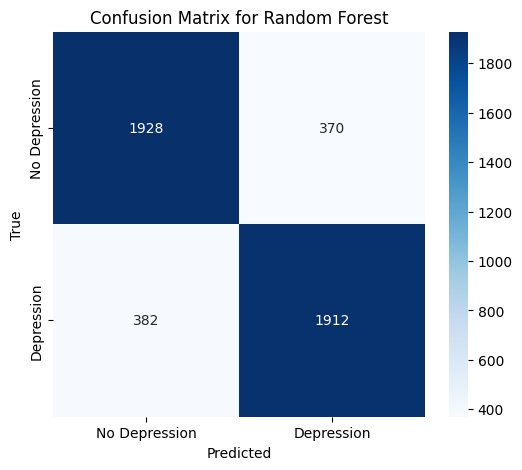

In [404]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Plot the confusion matrix using seaborn with a blue color palette
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

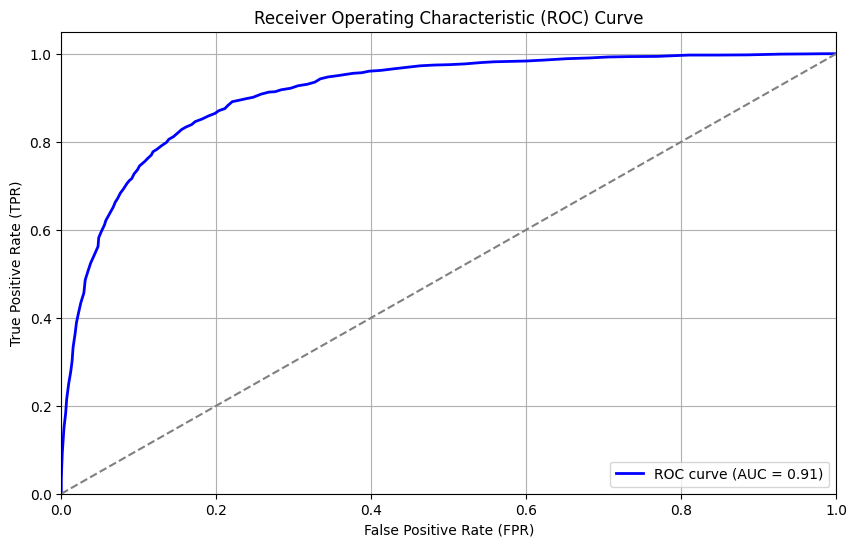

In [388]:
# Calculate ROC curve using the predicted probabilities
# Use predict_proba to get the probabilities for class '1' (depression)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (depression)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [406]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame with the feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train contains the feature names
    'Importance': importances
})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                      Feature  Importance
6          Suicidal Thoughts    0.205413
2          Academic Pressure    0.158746
8           Financial Stress    0.092071
1                        Age    0.073140
7                Study Hours    0.068661
3         Study Satisfaction    0.044953
5             Dietary Habits    0.036498
11             CGPA_category    0.035185
4             Sleep Duration    0.032407
10           Education Level    0.019349
0                     Gender    0.015974
9             Mental History    0.014619
43         Faculty_Economics    0.008149
42  Faculty_Computer Science    0.007038
48        Faculty_No Faculty    0.007003
34             City_Srinagar    0.006724
51          Faculty_Sciences    0.006652
44         Faculty_Education    0.006330
22               City_Kalyan    0.006252
52        Faculty_Technology    0.006084
39          City_Vasai-Virar    0.005994
19            City_Hyderabad    0.005813
49          Faculty_Pharmacy    0.0

COMMENT: The Random Forest model achieved an accuracy of 83.6%, indicating strong overall performance. For class 0 (no depression), precision was 0.83, recall was 0.84, and the F1-score was 0.84. For class 1 (depression), precision was 0.84, recall was 0.83, and the F1-score was 0.84. The macro and weighted averages for precision, recall, and F1-score were all 0.84, demonstrating a balanced performance for both classes.

The confusion matrix reveals that the model correctly predicted 1928 instances of class 0 and 1912 instances of class 1. However, it made 370 false positive errors, predicting depression when the actual label was no depression, and 382 false negative errors, where it failed to identify depression. Despite the slight imbalance in the number of false positives and false negatives, the performance remains robust overall, with a high number of true positives for both classes.

The model also achieved an excellent ROC AUC score of 0.91, indicating its strong ability to distinguish between the two classes. The 100 decision trees used in the Random Forest contribute to its stable and reliable performance, with a good trade-off between precision and recall. This model demonstrates high predictive power and is effective at handling both classes with minimal bias.

#### Gradient Boosting

In [403]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model using pre-split data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))  # Accuracy on test set
print("Classification Report:\n", classification_report(y_test, y_pred_gb))  # Precision, recall, F1-score for each class

# Compute the ROC AUC score
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (depression)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
print("ROC AUC Score:", roc_auc_gb)

Accuracy Score: 0.8434233449477352
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2298
           1       0.84      0.85      0.84      2294

    accuracy                           0.84      4592
   macro avg       0.84      0.84      0.84      4592
weighted avg       0.84      0.84      0.84      4592

ROC AUC Score: 0.9190069375363741


Confusion Matrix:
 [[1924  374]
 [ 345 1949]]


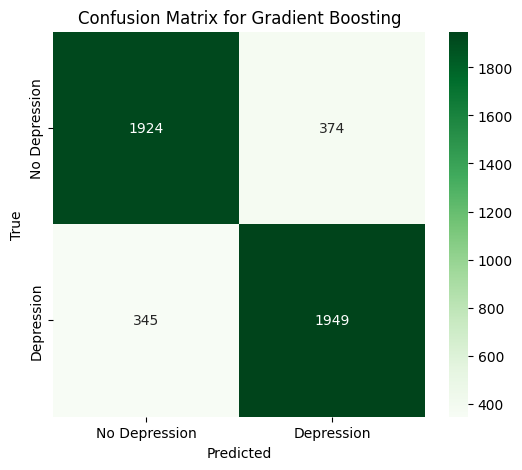

In [402]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:\n", conf_matrix_gb)

# Plot the confusion matrix using seaborn with a green color palette
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Greens", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

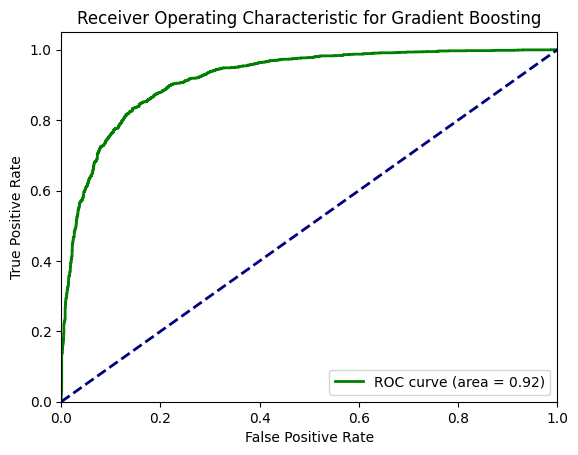

In [392]:
# ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb_curve = auc(fpr_gb, tpr_gb)

# Plot the ROC curve in green
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'ROC curve (area = {roc_auc_gb_curve:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

In [393]:
# Feature Importances (pairing with feature names)
importances_gb = gb_model.feature_importances_

# Pairing each feature with its importance and displaying in a readable format
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_gb
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (sorted):\n", feature_importance_df)

Feature Importances (sorted):
                      Feature  Importance
6          Suicidal Thoughts    0.514952
2          Academic Pressure    0.239533
8           Financial Stress    0.112211
1                        Age    0.048140
7                Study Hours    0.028497
5             Dietary Habits    0.025147
3         Study Satisfaction    0.016654
4             Sleep Duration    0.007254
9             Mental History    0.001570
11             CGPA_category    0.001031
10           Education Level    0.000660
41              Faculty_Arts    0.000652
21               City_Jaipur    0.000640
29               City_Nagpur    0.000379
33               City_Rajkot    0.000348
31                City_Patna    0.000200
27               City_Meerut    0.000196
19            City_Hyderabad    0.000164
45       Faculty_Engineering    0.000138
39          City_Vasai-Virar    0.000136
46               Faculty_Law    0.000135
12            City_Ahmedabad    0.000132
14               City_Bhop

COMMENT: The Gradient Boosting model achieved an accuracy of 84.3%, demonstrating strong overall performance. For class 0 (no depression), precision was 0.85, recall was 0.84, and the F1-score was 0.84. For class 1 (depression), precision was 0.84, recall was 0.85, and the F1-score was 0.84. Both the macro and weighted averages for precision, recall, and F1-score were all 0.84, indicating a balanced performance across both classes.

The confusion matrix shows that the model correctly predicted 1924 instances of class 0 and 1949 instances of class 1. However, it made 374 false positive errors, predicting depression when the actual label was no depression, and 345 false negative errors, where it failed to identify depression. The model performed well across both classes with relatively few misclassifications, reflecting its balanced nature.

The model also achieved a high ROC AUC score of 0.92, indicating excellent discriminative ability between the two classes. Overall, the Gradient Boosting model is effective at handling both classes, with a good balance between precision and recall, making it suitable for applications where both classes are important.

Let's perform the model used that need the standardization

#### Logistic model

In [398]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardizing the data (useful to improve model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

# Calculate the probability for the positive class (depression)
y_pred_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Accuracy Score: 0.8423344947735192
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2298
           1       0.84      0.85      0.84      2294

    accuracy                           0.84      4592
   macro avg       0.84      0.84      0.84      4592
weighted avg       0.84      0.84      0.84      4592

ROC AUC Score: 0.9191951152702438


Confusion Matrix:
 [[1924  374]
 [ 350 1944]]


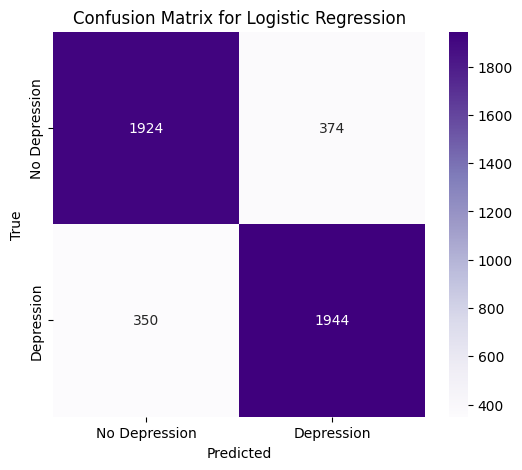

In [401]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

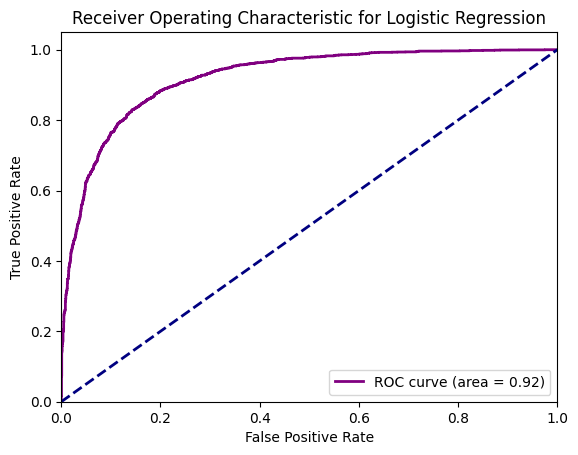

In [400]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='#800080', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Purple color
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

COMMENT: The Logistic Regression model achieved an accuracy of 84.2%, demonstrating solid overall performance. For class 0 (no depression), precision was 0.85, recall was 0.84, and the F1-score was 0.84. For class 1 (depression), precision was 0.84, recall was 0.85, and the F1-score was 0.84. Both the macro and weighted averages for precision, recall, and F1-score were all 0.84, reflecting a balanced performance across both classes.

The confusion matrix shows that the model correctly predicted 1924 instances of class 0 and 1944 instances of class 1. However, it made 374 false positive errors, predicting depression when the actual label was no depression, and 350 false negative errors, where it failed to identify depression. The performance across both classes is balanced, with only minor misclassifications, indicating that the model is effective in distinguishing between the two conditions.

The model also achieved a high ROC AUC score of 0.92, which indicates excellent ability to distinguish between the two classes. Overall, the Logistic Regression model is well-suited for this binary classification task, providing a good trade-off between precision and recall for both classes.

#### Deep learning model

In [418]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Since data have been already standardized, 
# Directly convert them to PyTorch tensors
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Binary classification (0 or 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Step 2: Define the Deep Learning model (Multi-Layer Perceptron)
class DeepLearningModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeepLearningModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)  # For binary classification, softmax for probabilities

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.softmax(x)  # Output probabilities for each class

# Step 3: Initialize the model, loss function, and optimizer
input_dim = X_train_scaled.shape[1]  # Number of features
hidden_dim = 64  # You can adjust this
output_dim = 2  # Binary classification, so 2 outputs (depression or not)

model = DeepLearningModel(input_dim, hidden_dim, output_dim)

# CrossEntropyLoss for binary classification
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training the model
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 10 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 5: Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_tensor, dim=1)

# Calculate Accuracy and Classification Report
accuracy = accuracy_score(y_test_tensor, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test_tensor, y_pred))

# ROC AUC Score
y_pred_prob = model(X_test_tensor)[:, 1].detach().numpy()  # Probabilities for class 1 (depression)
roc_auc = roc_auc_score(y_test_tensor, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

Epoch [100/2000], Loss: 0.4493
Epoch [200/2000], Loss: 0.4322
Epoch [300/2000], Loss: 0.4169
Epoch [400/2000], Loss: 0.4054
Epoch [500/2000], Loss: 0.3998
Epoch [600/2000], Loss: 0.3976
Epoch [700/2000], Loss: 0.3967
Epoch [800/2000], Loss: 0.3962
Epoch [900/2000], Loss: 0.3959
Epoch [1000/2000], Loss: 0.3956
Epoch [1100/2000], Loss: 0.3955
Epoch [1200/2000], Loss: 0.3954
Epoch [1300/2000], Loss: 0.3953
Epoch [1400/2000], Loss: 0.3953
Epoch [1500/2000], Loss: 0.3953
Epoch [1600/2000], Loss: 0.3952
Epoch [1700/2000], Loss: 0.3952
Epoch [1800/2000], Loss: 0.3950
Epoch [1900/2000], Loss: 0.3949
Epoch [2000/2000], Loss: 0.3949
Accuracy: 0.8227
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      2298
           1       0.82      0.83      0.82      2294

    accuracy                           0.82      4592
   macro avg       0.82      0.82      0.82      4592
weighted avg       0.82      0.82      0.82      4592

R

Confusion Matrix:
 [[1875  423]
 [ 391 1903]]


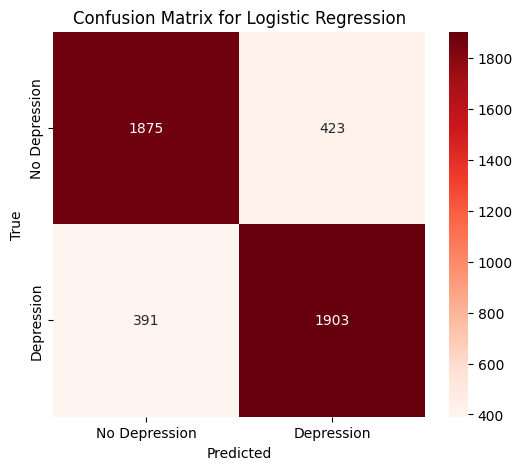

In [422]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_tensor, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn with a pure red color palette
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

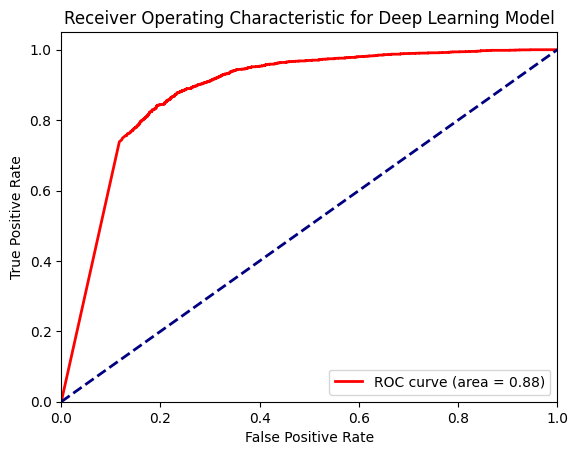

In [423]:
# ROC Curve with red color
fpr, tpr, thresholds = roc_curve(y_test_tensor, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Deep Learning Model')
plt.legend(loc='lower right')
plt.show()

COMMENT: The Deep Learning model achieved an accuracy of 82.27%, reflecting solid performance for binary classification. For class 0 (no depression), precision was 0.83, recall was 0.82, and the F1-score was 0.82. For class 1 (depression), precision was 0.82, recall was 0.83, and the F1-score was 0.82. These results suggest a balanced performance across both classes, with minor differences between precision and recall. The confusion matrix shows that the model correctly predicted 1875 instances of class 0 and 1903 of class 1. It made 423 false positives and 391 false negatives, indicating some room for improvement in error reduction. With a ROC AUC score of 0.882, the model demonstrates good ability to differentiate between depression and no depression. In summary, the Deep Learning model performs well, with balanced metrics and a strong ROC AUC score. Further improvements could be made through hyperparameter tuning or architectural adjustments to enhance performance.

#### Models comparison

Among the models evaluated, **Gradient Boosting** shows the most promising results with an accuracy of 84.3% and an impressive ROC AUC score of 0.92. Its performance is well-balanced across both classes, with precision, recall, and F1-scores consistently near 0.84, demonstrating its strong ability to distinguish between the two classes effectively.
**Logistic Regression** follows closely behind, with an accuracy of 84.2% and a similar ROC AUC score of 0.92. While its overall performance is nearly identical to Gradient Boosting, the latter has a slight advantage due to its better handling of false positives and misclassifications.
**Random Forest** also performs well with an accuracy of 83.6% and an ROC AUC score of 0.91, but it slightly lags behind the top two models in terms of class imbalance management and error reduction.
**Deep Learning**, while decent, achieves a lower accuracy of 82.27%, and struggles more with false positives and false negatives, suggesting areas for improvement. Similarly, the **Decision Tree** model performs the weakest, with the lowest accuracy of 76.7% and a higher rate of misclassifications.

In summary, **Gradient Boosting** stands out as the best model due to its high accuracy, balanced performance, and ability to effectively manage precision and recall across both classes.